# $$Health-Insurance-Cross-Sell-Prediction$$


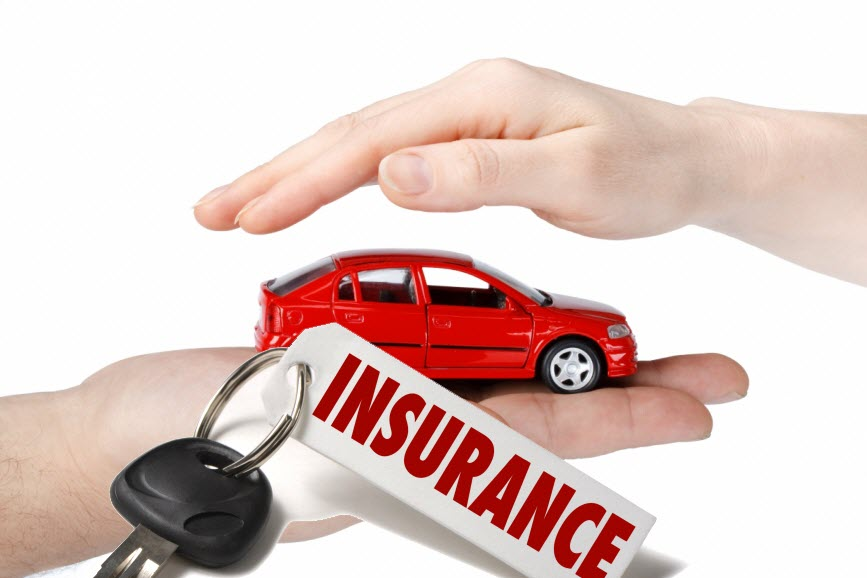

# Prelude

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# Objective

Build a model to predict whether a policyholder would be interested in Vehicle Insurance. 

# Notebook 
   - Step-1: **Importing Libraries and dataset**
   - Step-2: **Exploratory Data Analysis**
   - Step-3: **Data Cleaning and Preprocessing**
   - Step-4: **Data-Modelling-and-Evaluation**
   - Step-5: **Result and Conclusion**

# **Step-1: $$Importing-Libraries-and-Dataset$$**

## Libraries

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf

## Dataset
   - 1.a. Training Dataset

In [2]:
dataset= pd.read_csv('train.csv')
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# Checking Missing values
dataset.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
# Identifying datatypes and shape of training dataset
print(dataset.shape)
dataset.dtypes

(381109, 12)


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [5]:
# Drop ID
dataset.drop(labels='id',axis=1,inplace=True)
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# numeric features in dataset
dataset_num_features = ['Age', 'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

#Catagorical features dataset
dataset_cat_features = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']

# Step-2 $$Exploratory-Data-Analysis$$

### 2.a - Numeric features

In [7]:
print(dataset_num_features)

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [8]:
dataset[dataset_num_features].describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


### Data Distribution
   - **numeric features**

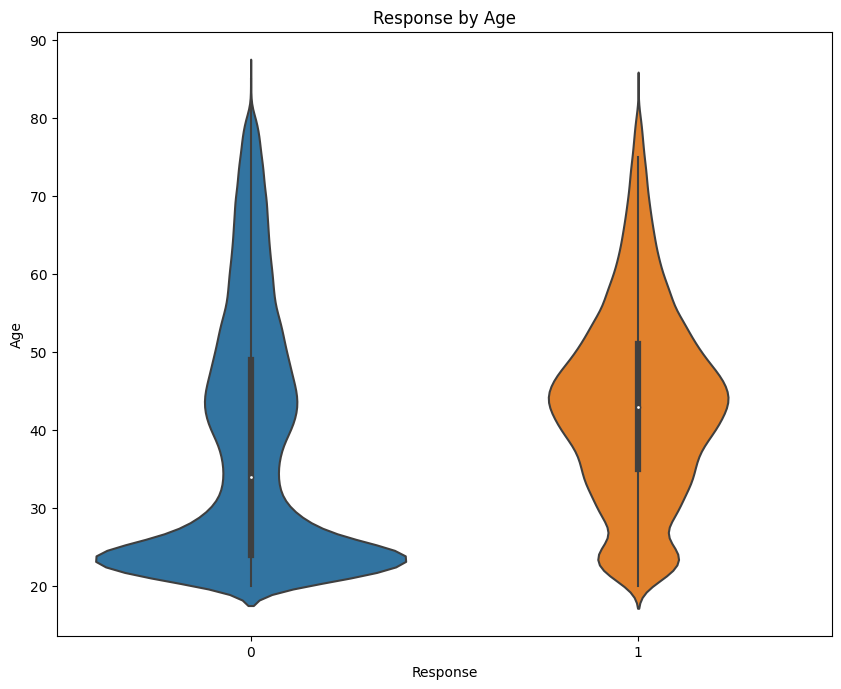

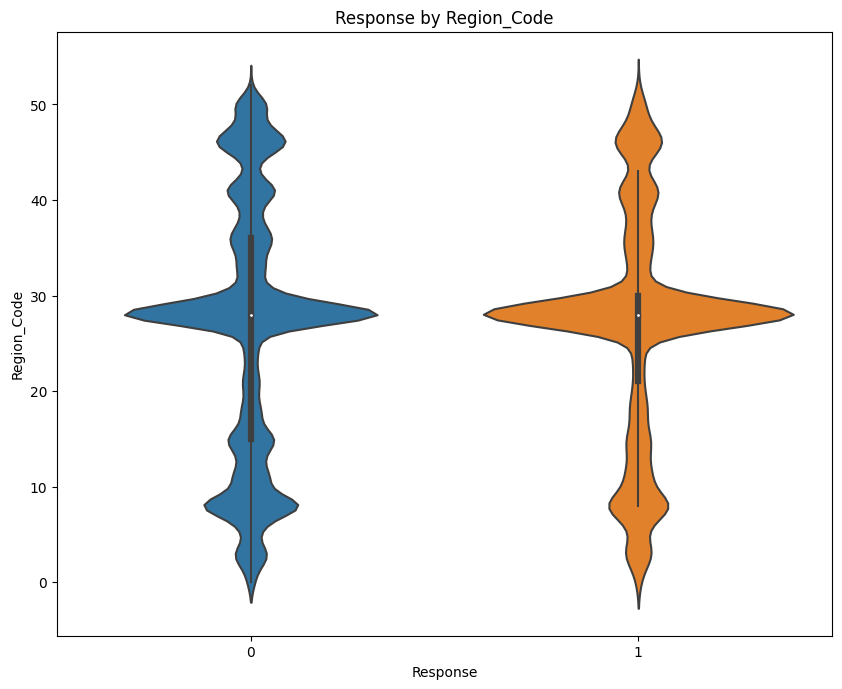

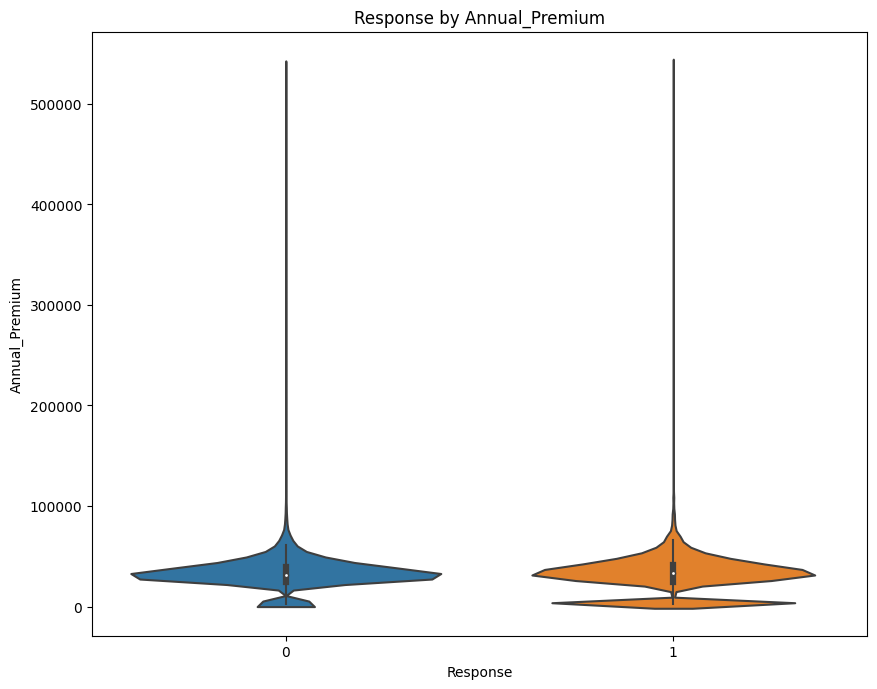

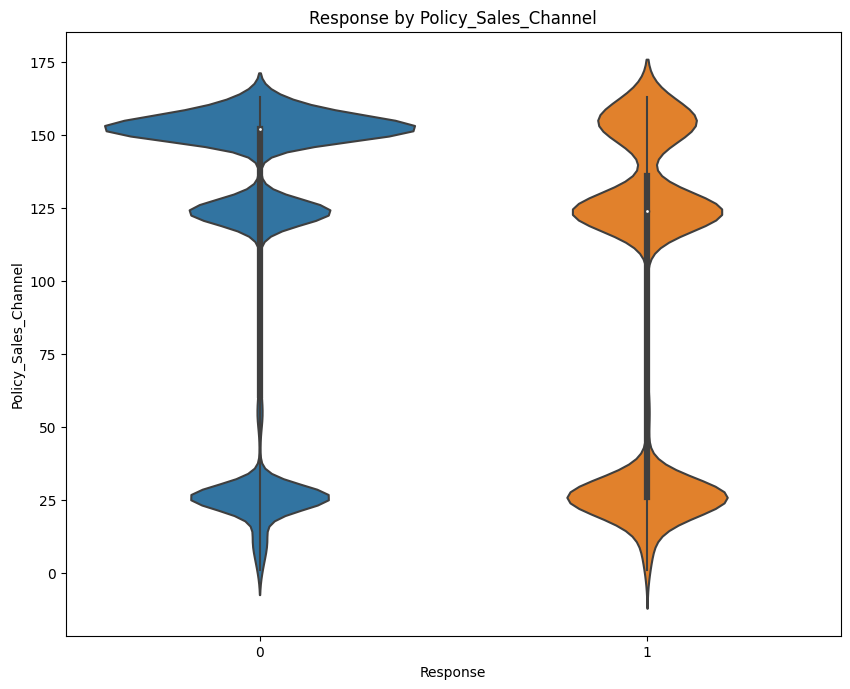

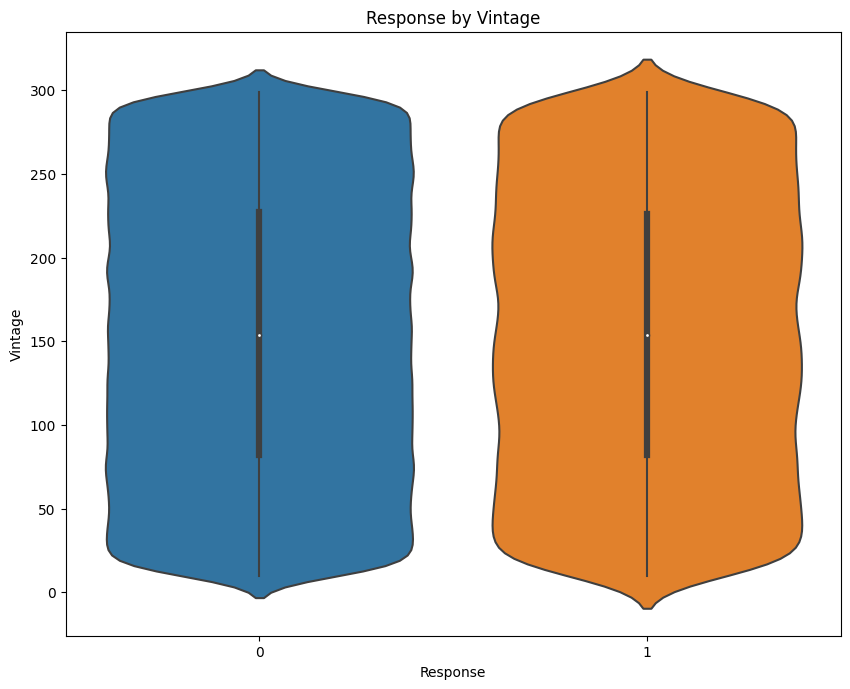

In [9]:
for i in dataset_num_features:   
    plt.figure(figsize=(10,8),dpi=100)
    sns.violinplot(x="Response",y=i, data=dataset)
    plt.title(f"Response by {i}")
    plt.show()

**<U> Inference<U>** :
   - Age: 
       - Between 20 to 85 years old.
       - 3/4 of the customer are below 50 years of age

   - Annual_premium:
       - Average annual premium ~ 30.5k. 
       
   - Vintage: 
       - Average customer association rate with company is approx 5 months.
       - Half of the customers are associated with the company between ~3 to ~7 months.


### Converting num_features to Cat_features

In [10]:
 

# Age
Age_range = pd.Series(pd.cut(dataset.Age, bins = 6, precision = 0),name='Age_range')

# Region_Code
Region_Code_range = pd.Series(pd.cut(dataset.Region_Code, bins = 10, precision = 0),name='Region_Code_range')

#Annual_Primium
Annual_Primium_range = pd.Series(pd.cut(dataset.Annual_Premium, bins = 5, precision = 0),name='Annual_Primium_range')

#Policy_Sales_Channel
Policy_Sales_Channel_range = pd.Series(pd.cut(dataset.Policy_Sales_Channel,bins = 10, precision = 0),name='Policy_Sales_Channel_range')

#Vintage
Vintage_range =pd.Series(pd.cut(dataset.Vintage,bins = 5, precision = 0),name='Vintage_range')

In [11]:
# Modified Categorical Dataset:

mod_dataset = pd.concat([Age_range,
                Region_Code_range,
                Annual_Primium_range,
                Policy_Sales_Channel_range,
                Vintage_range], 
               axis=1)

print('Modified Dataset Shape :', mod_dataset.shape,'\n______________________________________\n')
print('New Columns:',mod_dataset.columns,'\n______________________________________\n' )
print(mod_dataset.dtypes,'\n______________________________________\n')

mod_dataset.head()

Modified Dataset Shape : (381109, 5) 
______________________________________

New Columns: Index(['Age_range', 'Region_Code_range', 'Annual_Primium_range',
       'Policy_Sales_Channel_range', 'Vintage_range'],
      dtype='object') 
______________________________________

Age_range                     category
Region_Code_range             category
Annual_Primium_range          category
Policy_Sales_Channel_range    category
Vintage_range                 category
dtype: object 
______________________________________



,Age_range,Region_Code_range,Annual_Primium_range,Policy_Sales_Channel_range,Vintage_range
0,"(42.0, 52.0]","(26.0, 31.0]","(2092.0, 110137.0]","(17.0, 33.0]","(183.0, 241.0]"
1,"(74.0, 85.0]","(-0.1, 5.0]","(2092.0, 110137.0]","(17.0, 33.0]","(126.0, 183.0]"
2,"(42.0, 52.0]","(26.0, 31.0]","(2092.0, 110137.0]","(17.0, 33.0]","(10.0, 68.0]"
3,"(20.0, 31.0]","(10.0, 16.0]","(2092.0, 110137.0]","(147.0, 163.0]","(183.0, 241.0]"
4,"(20.0, 31.0]","(36.0, 42.0]","(2092.0, 110137.0]","(147.0, 163.0]","(10.0, 68.0]"


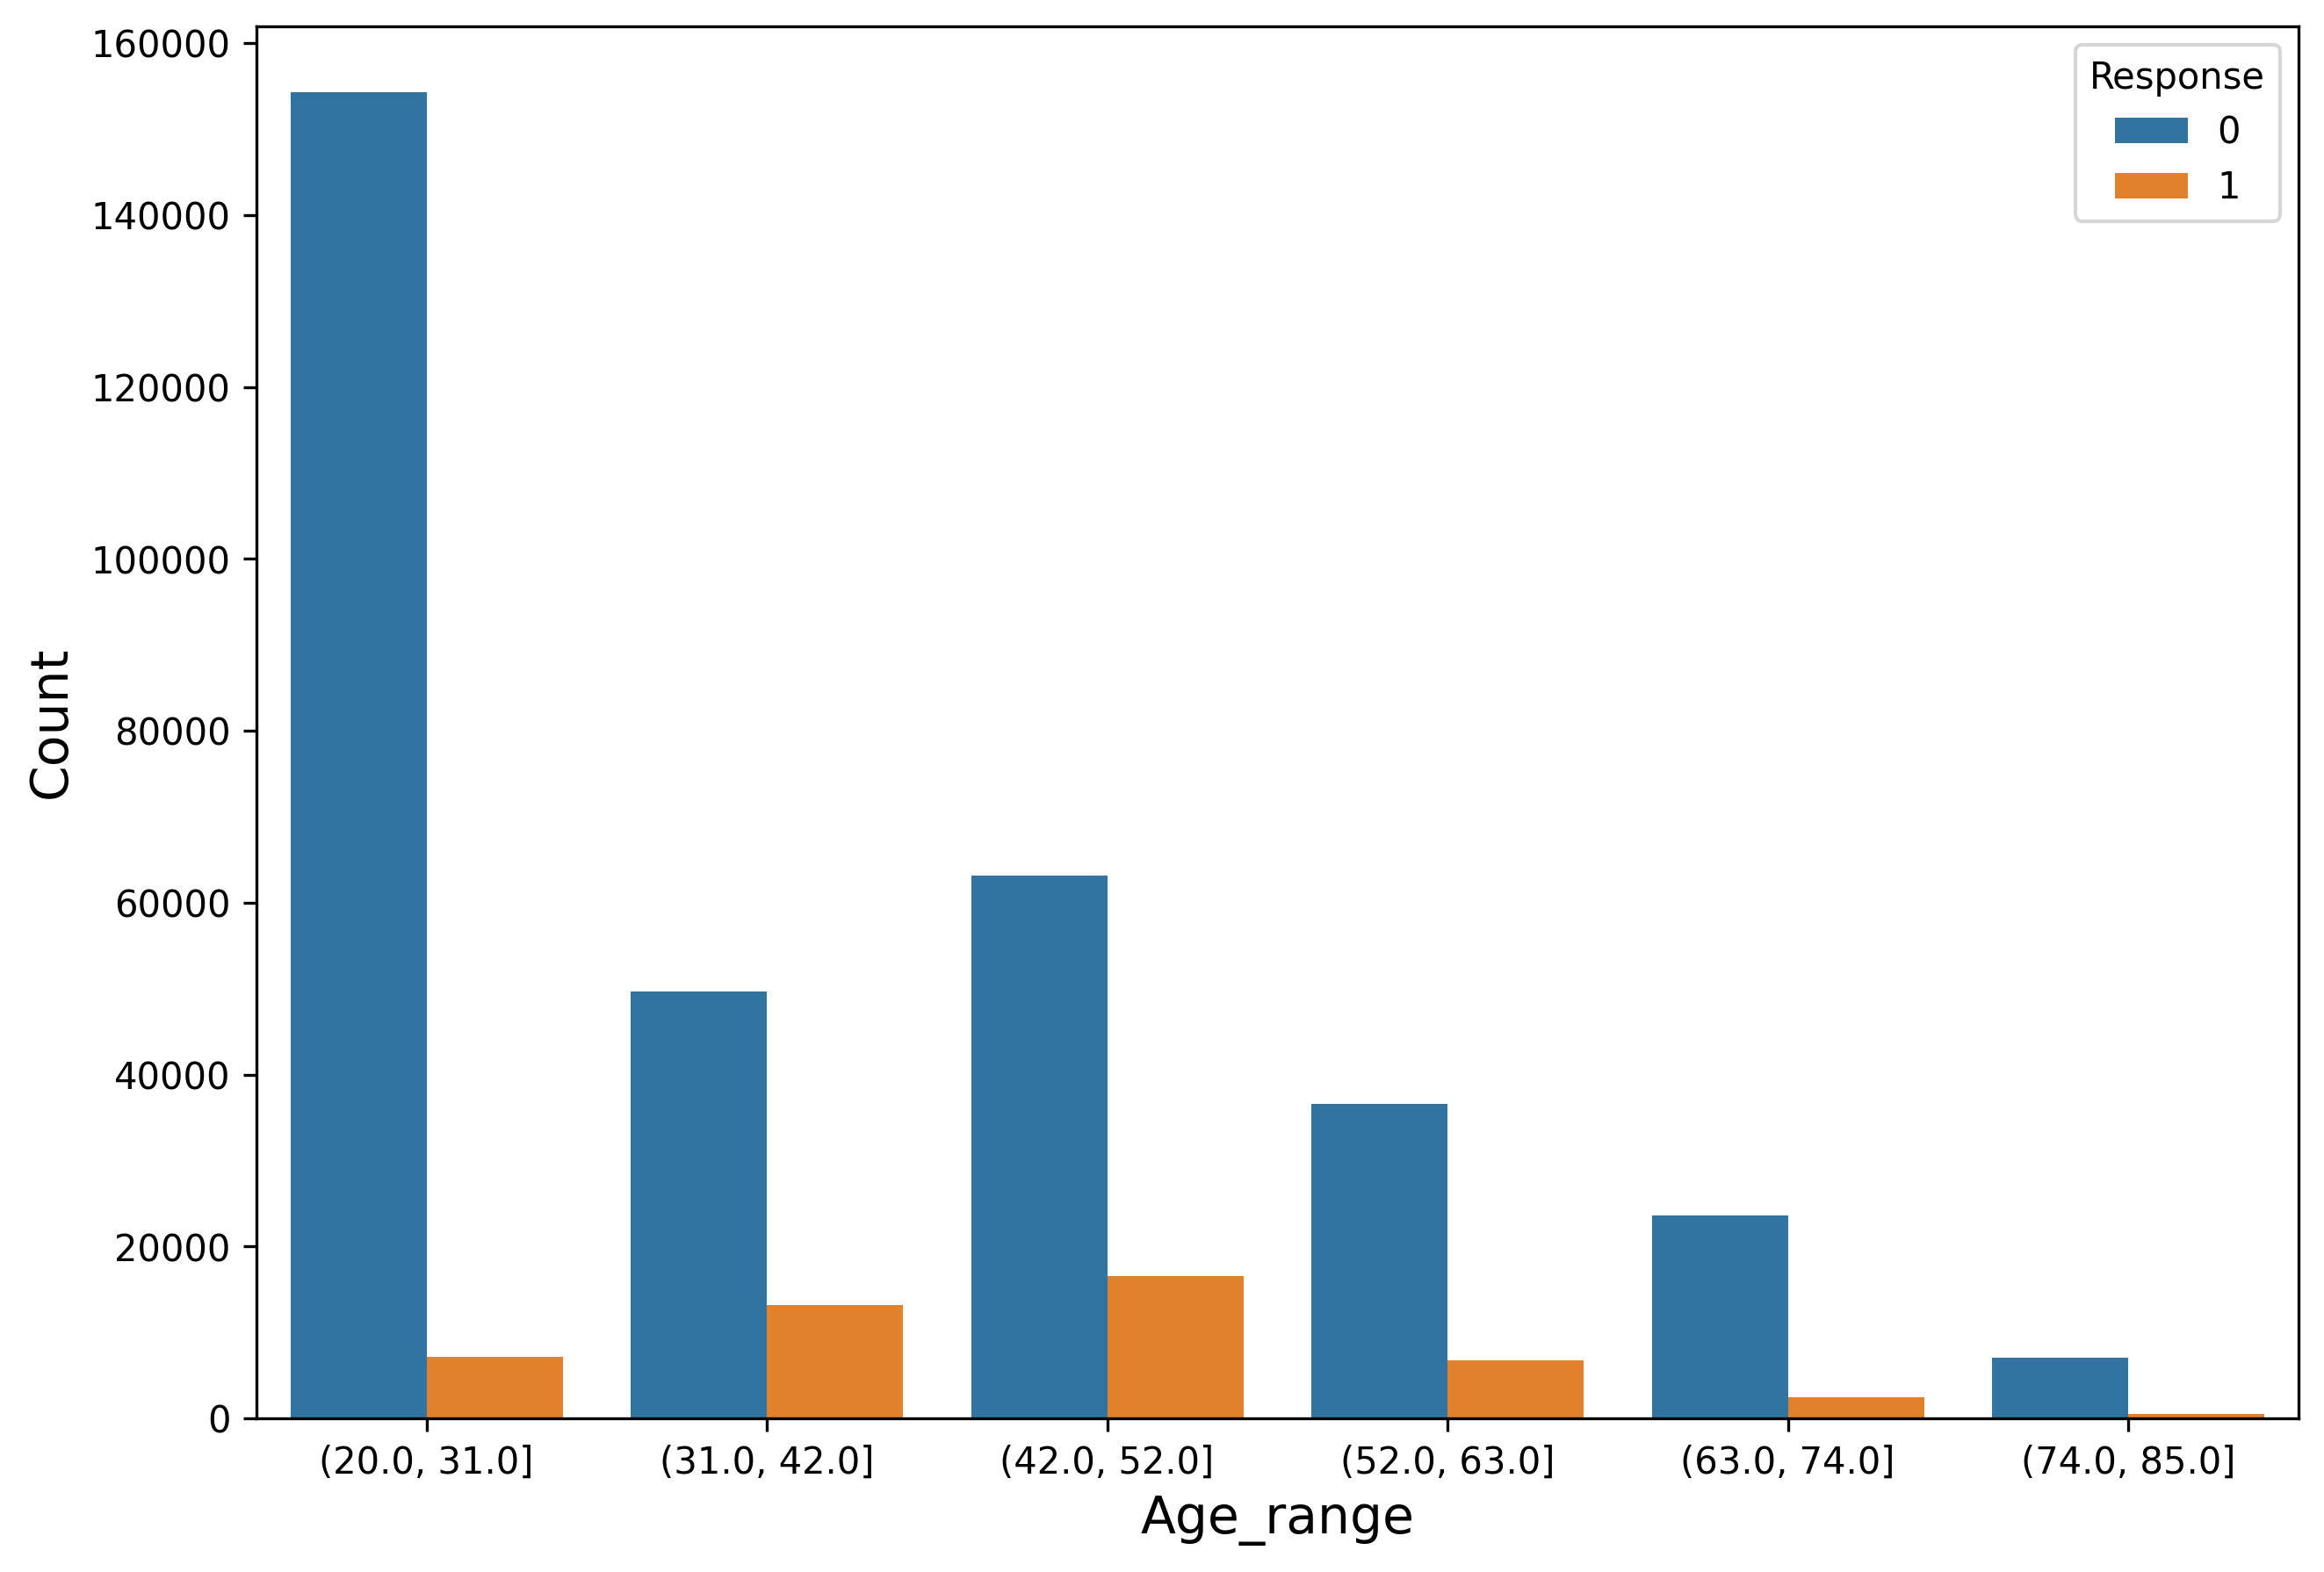

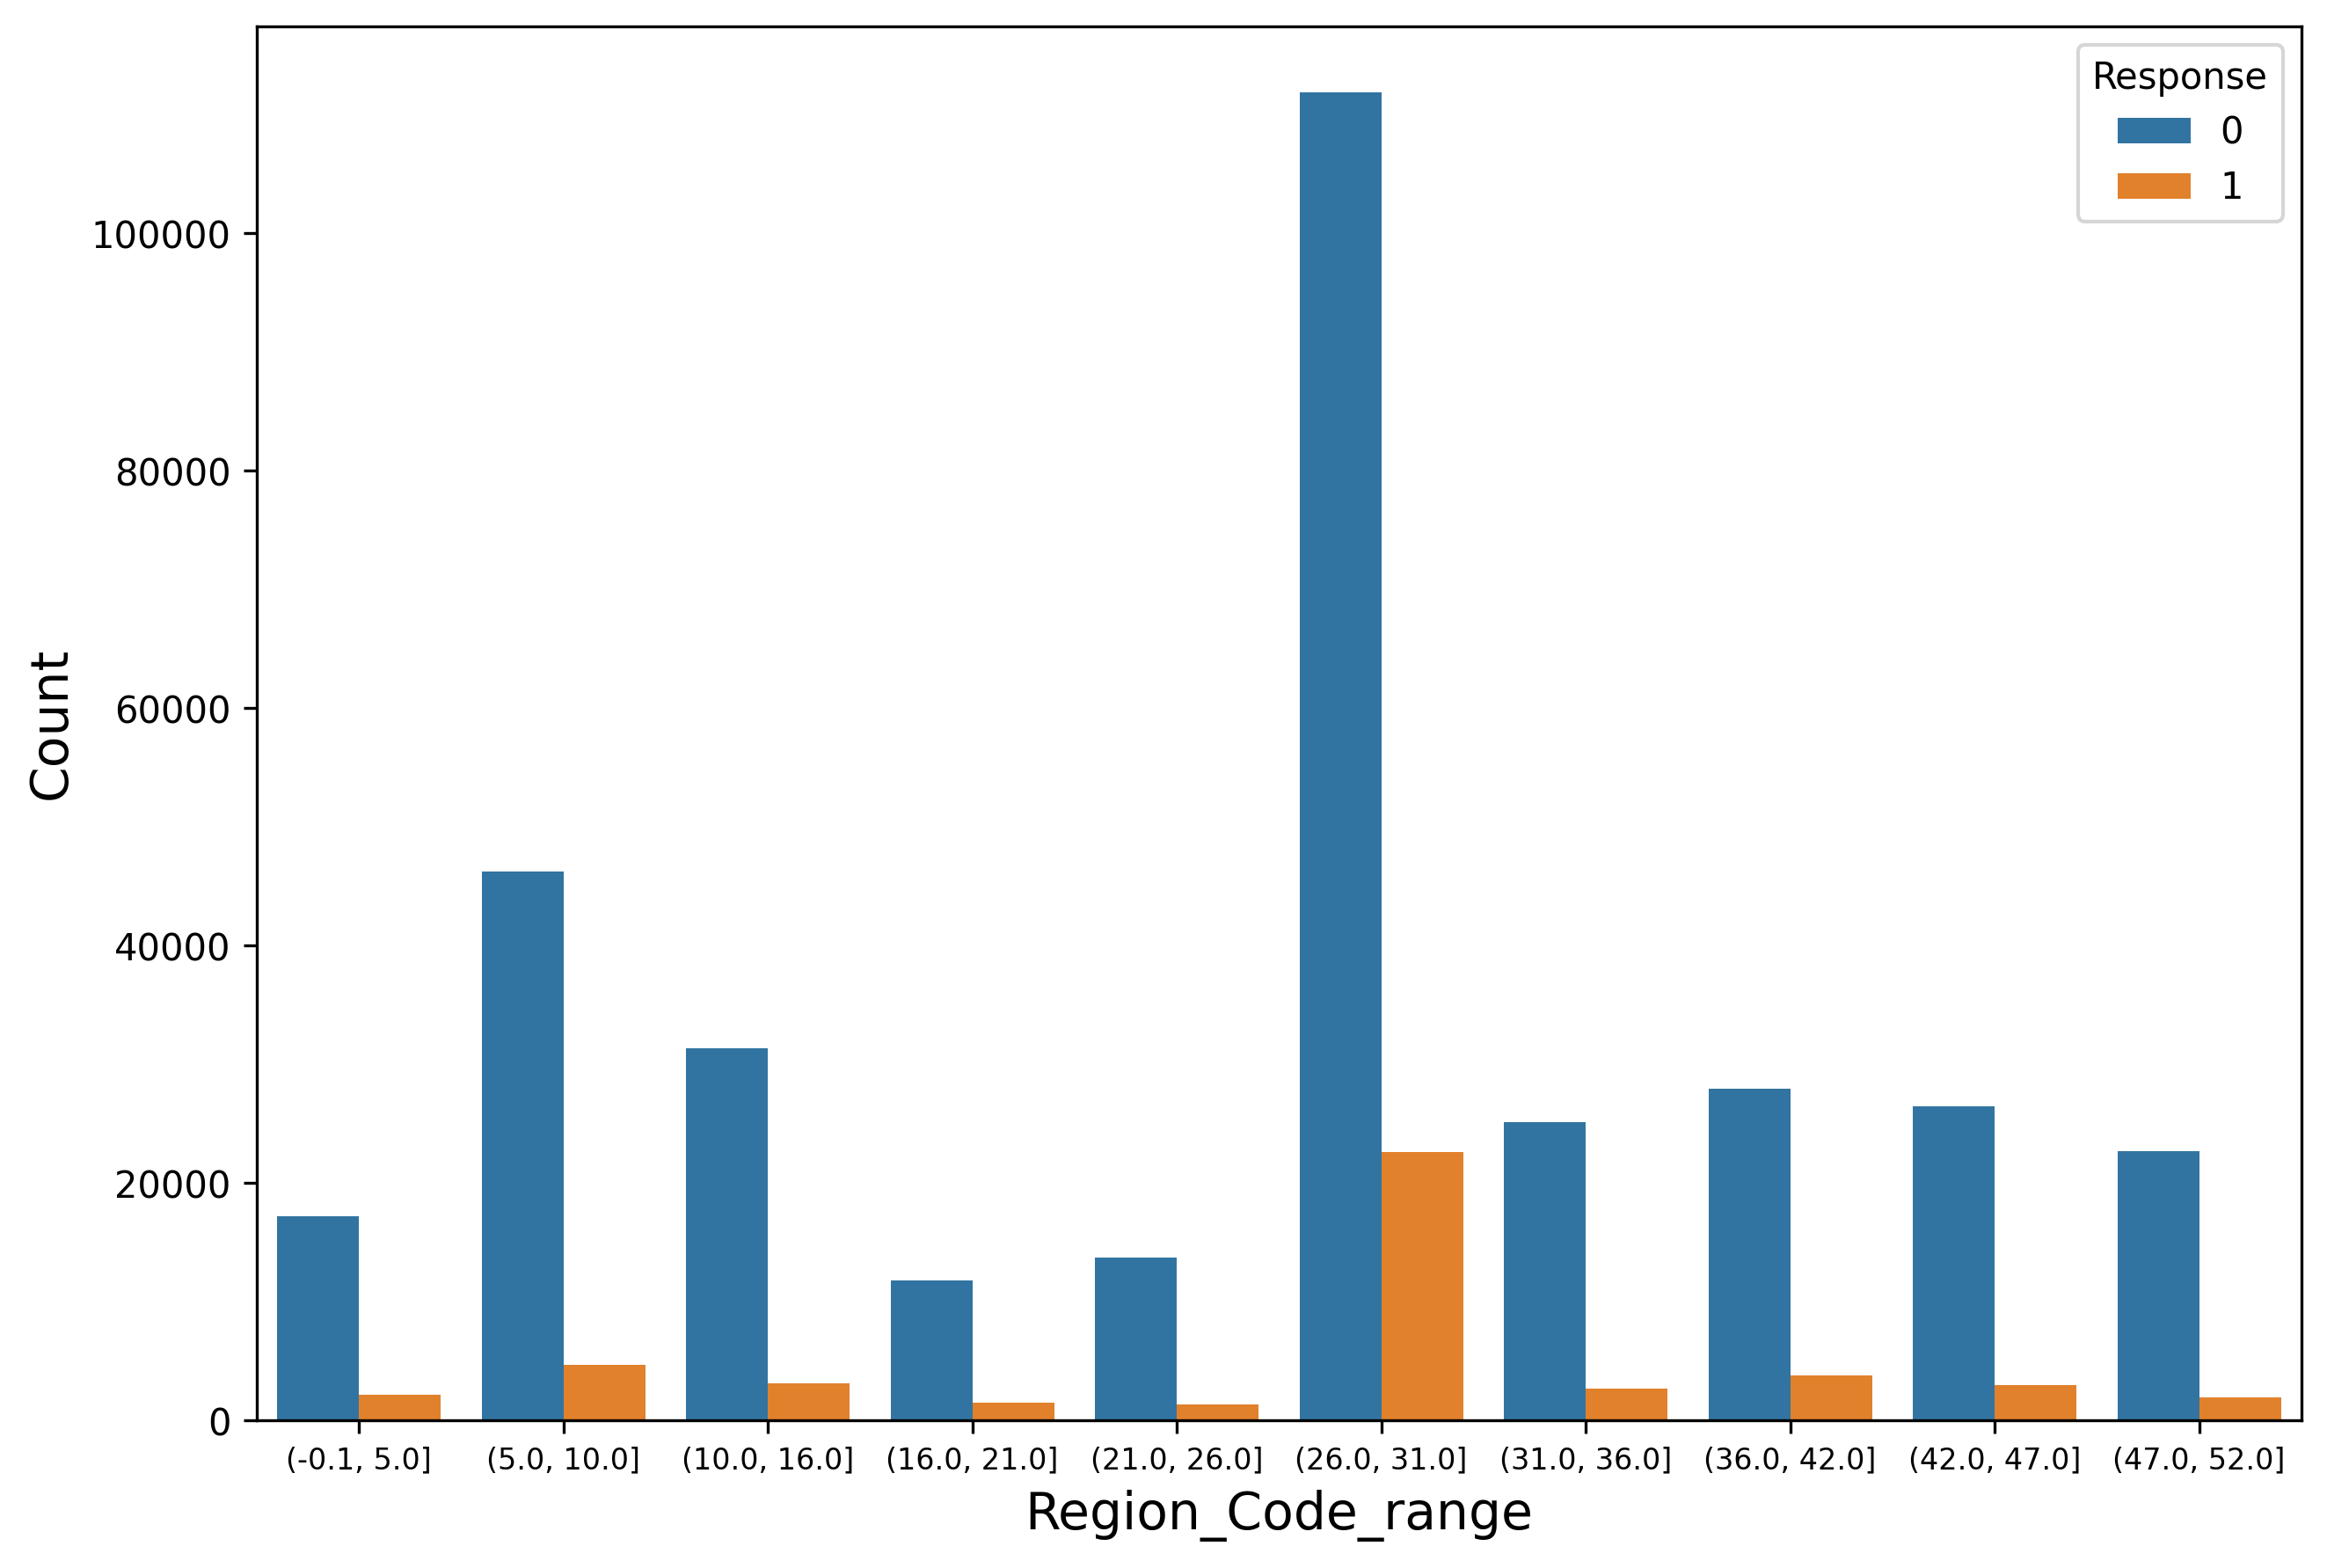

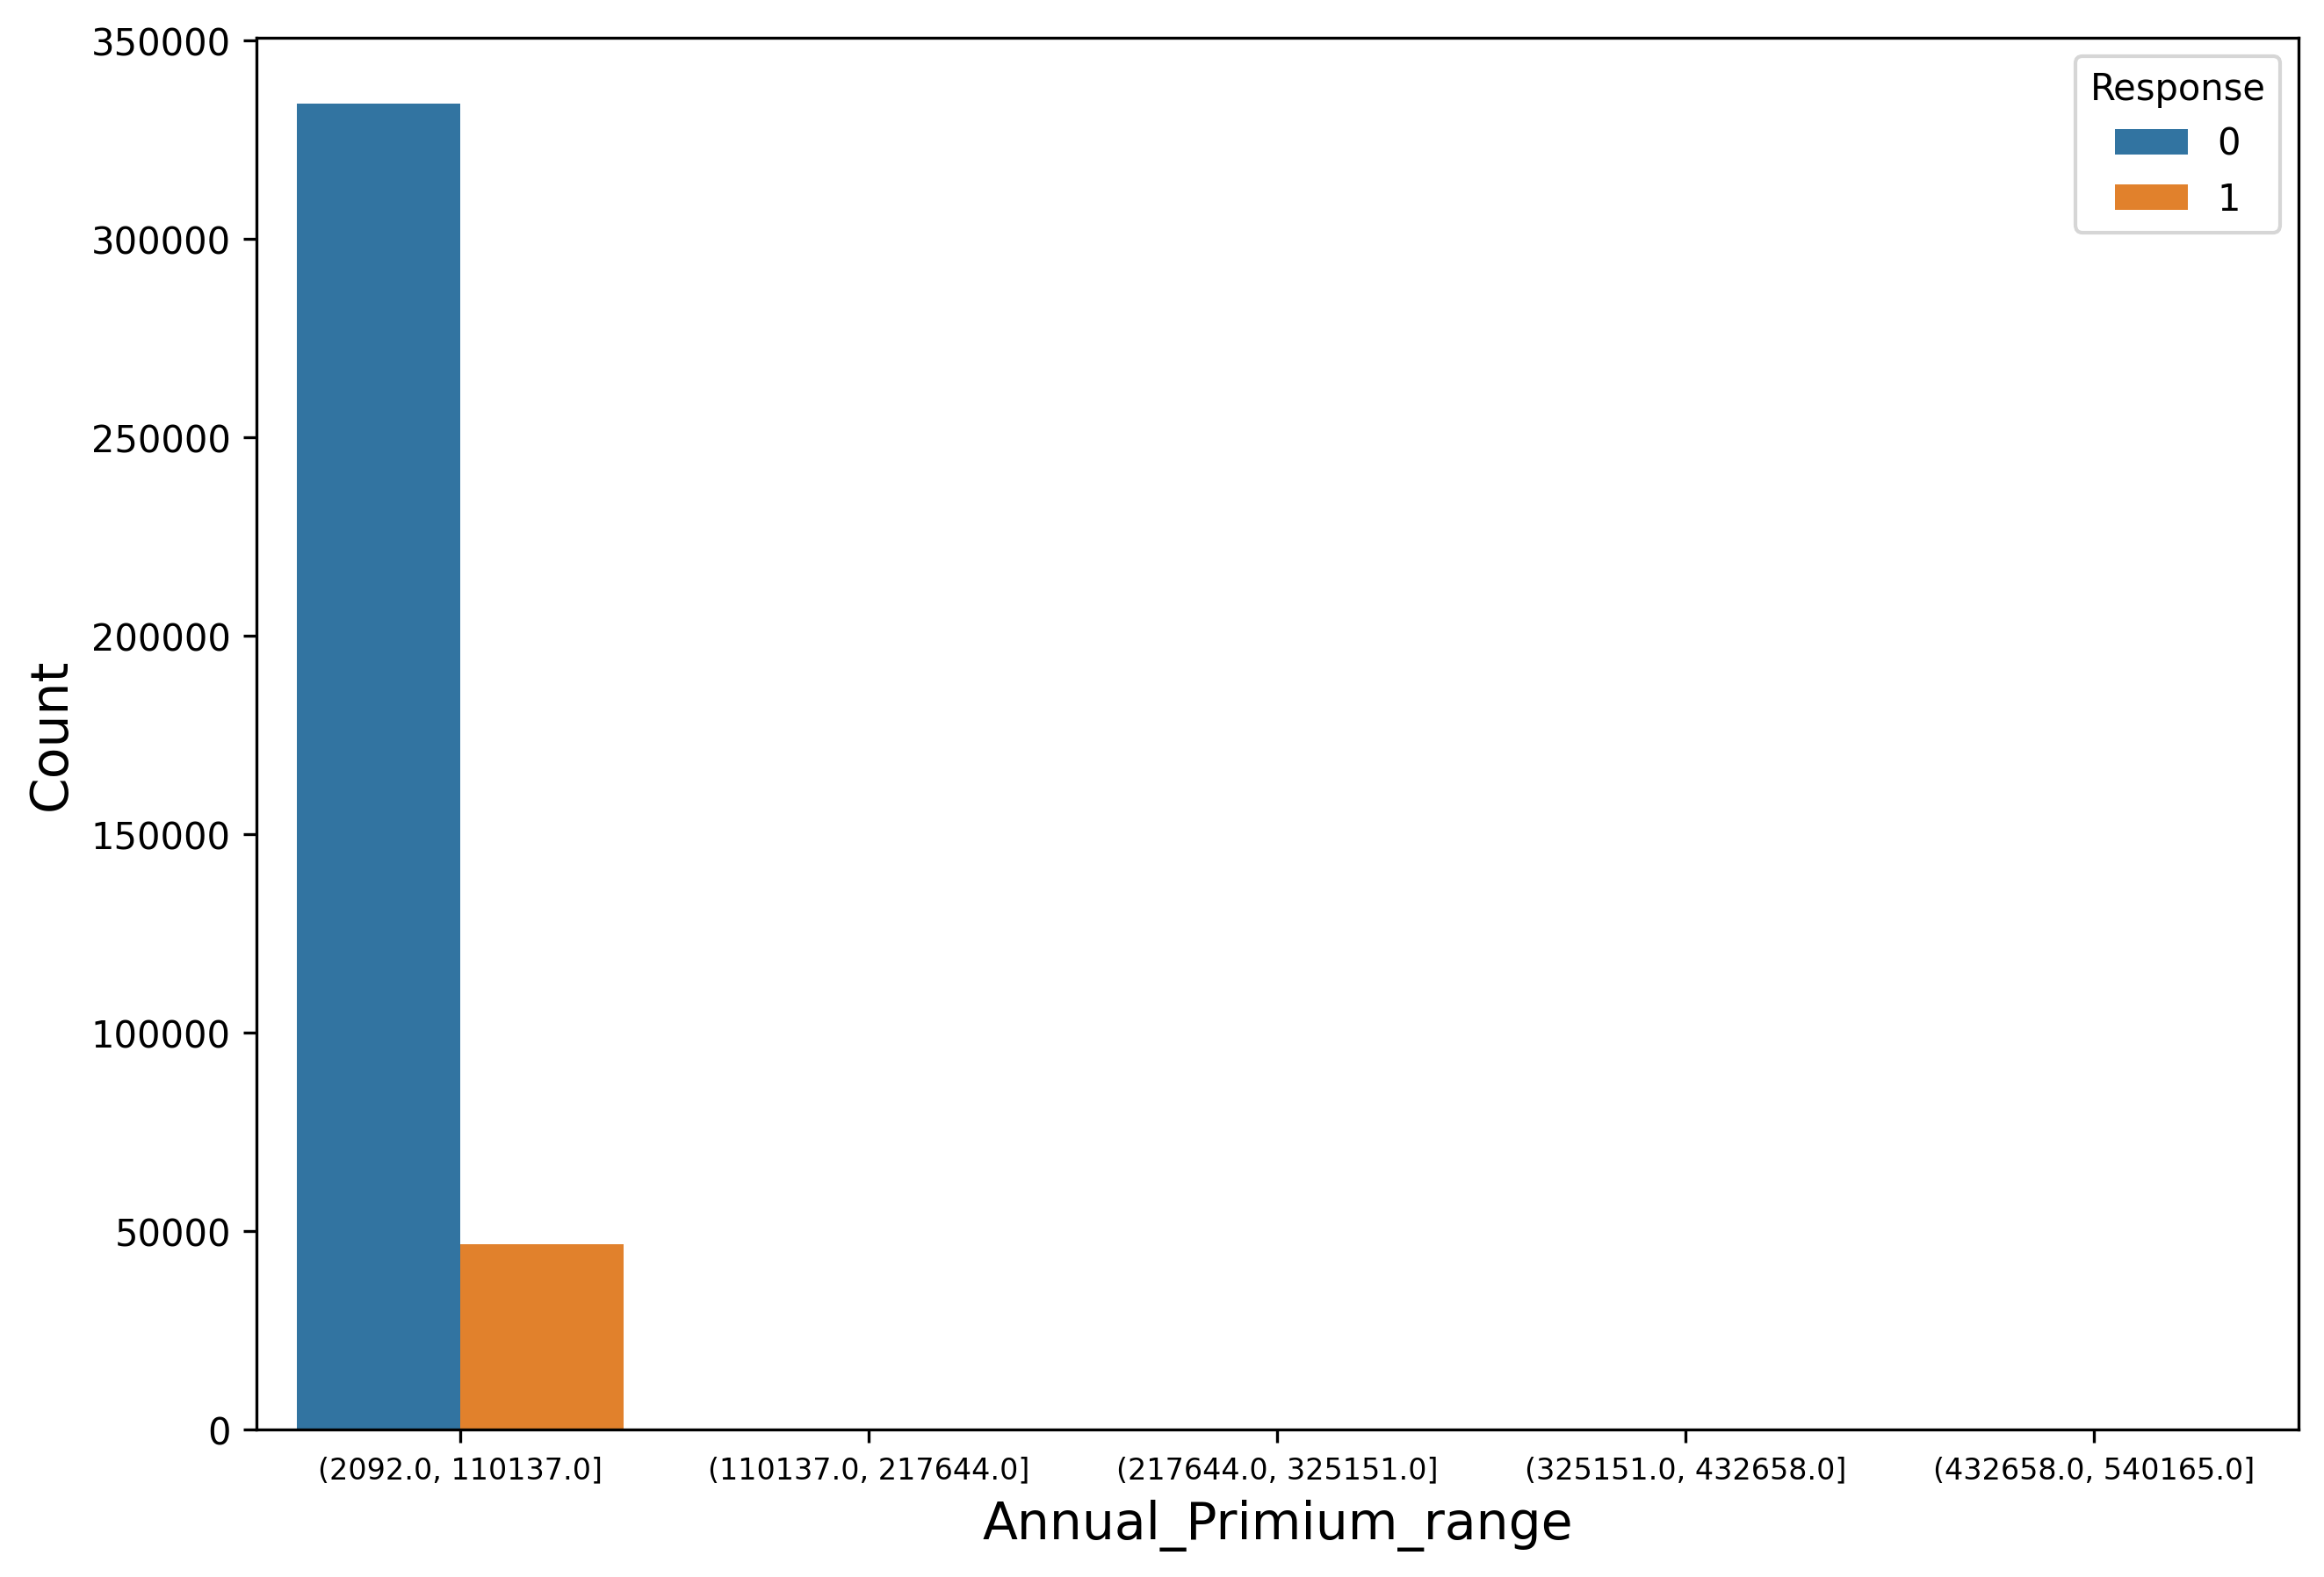

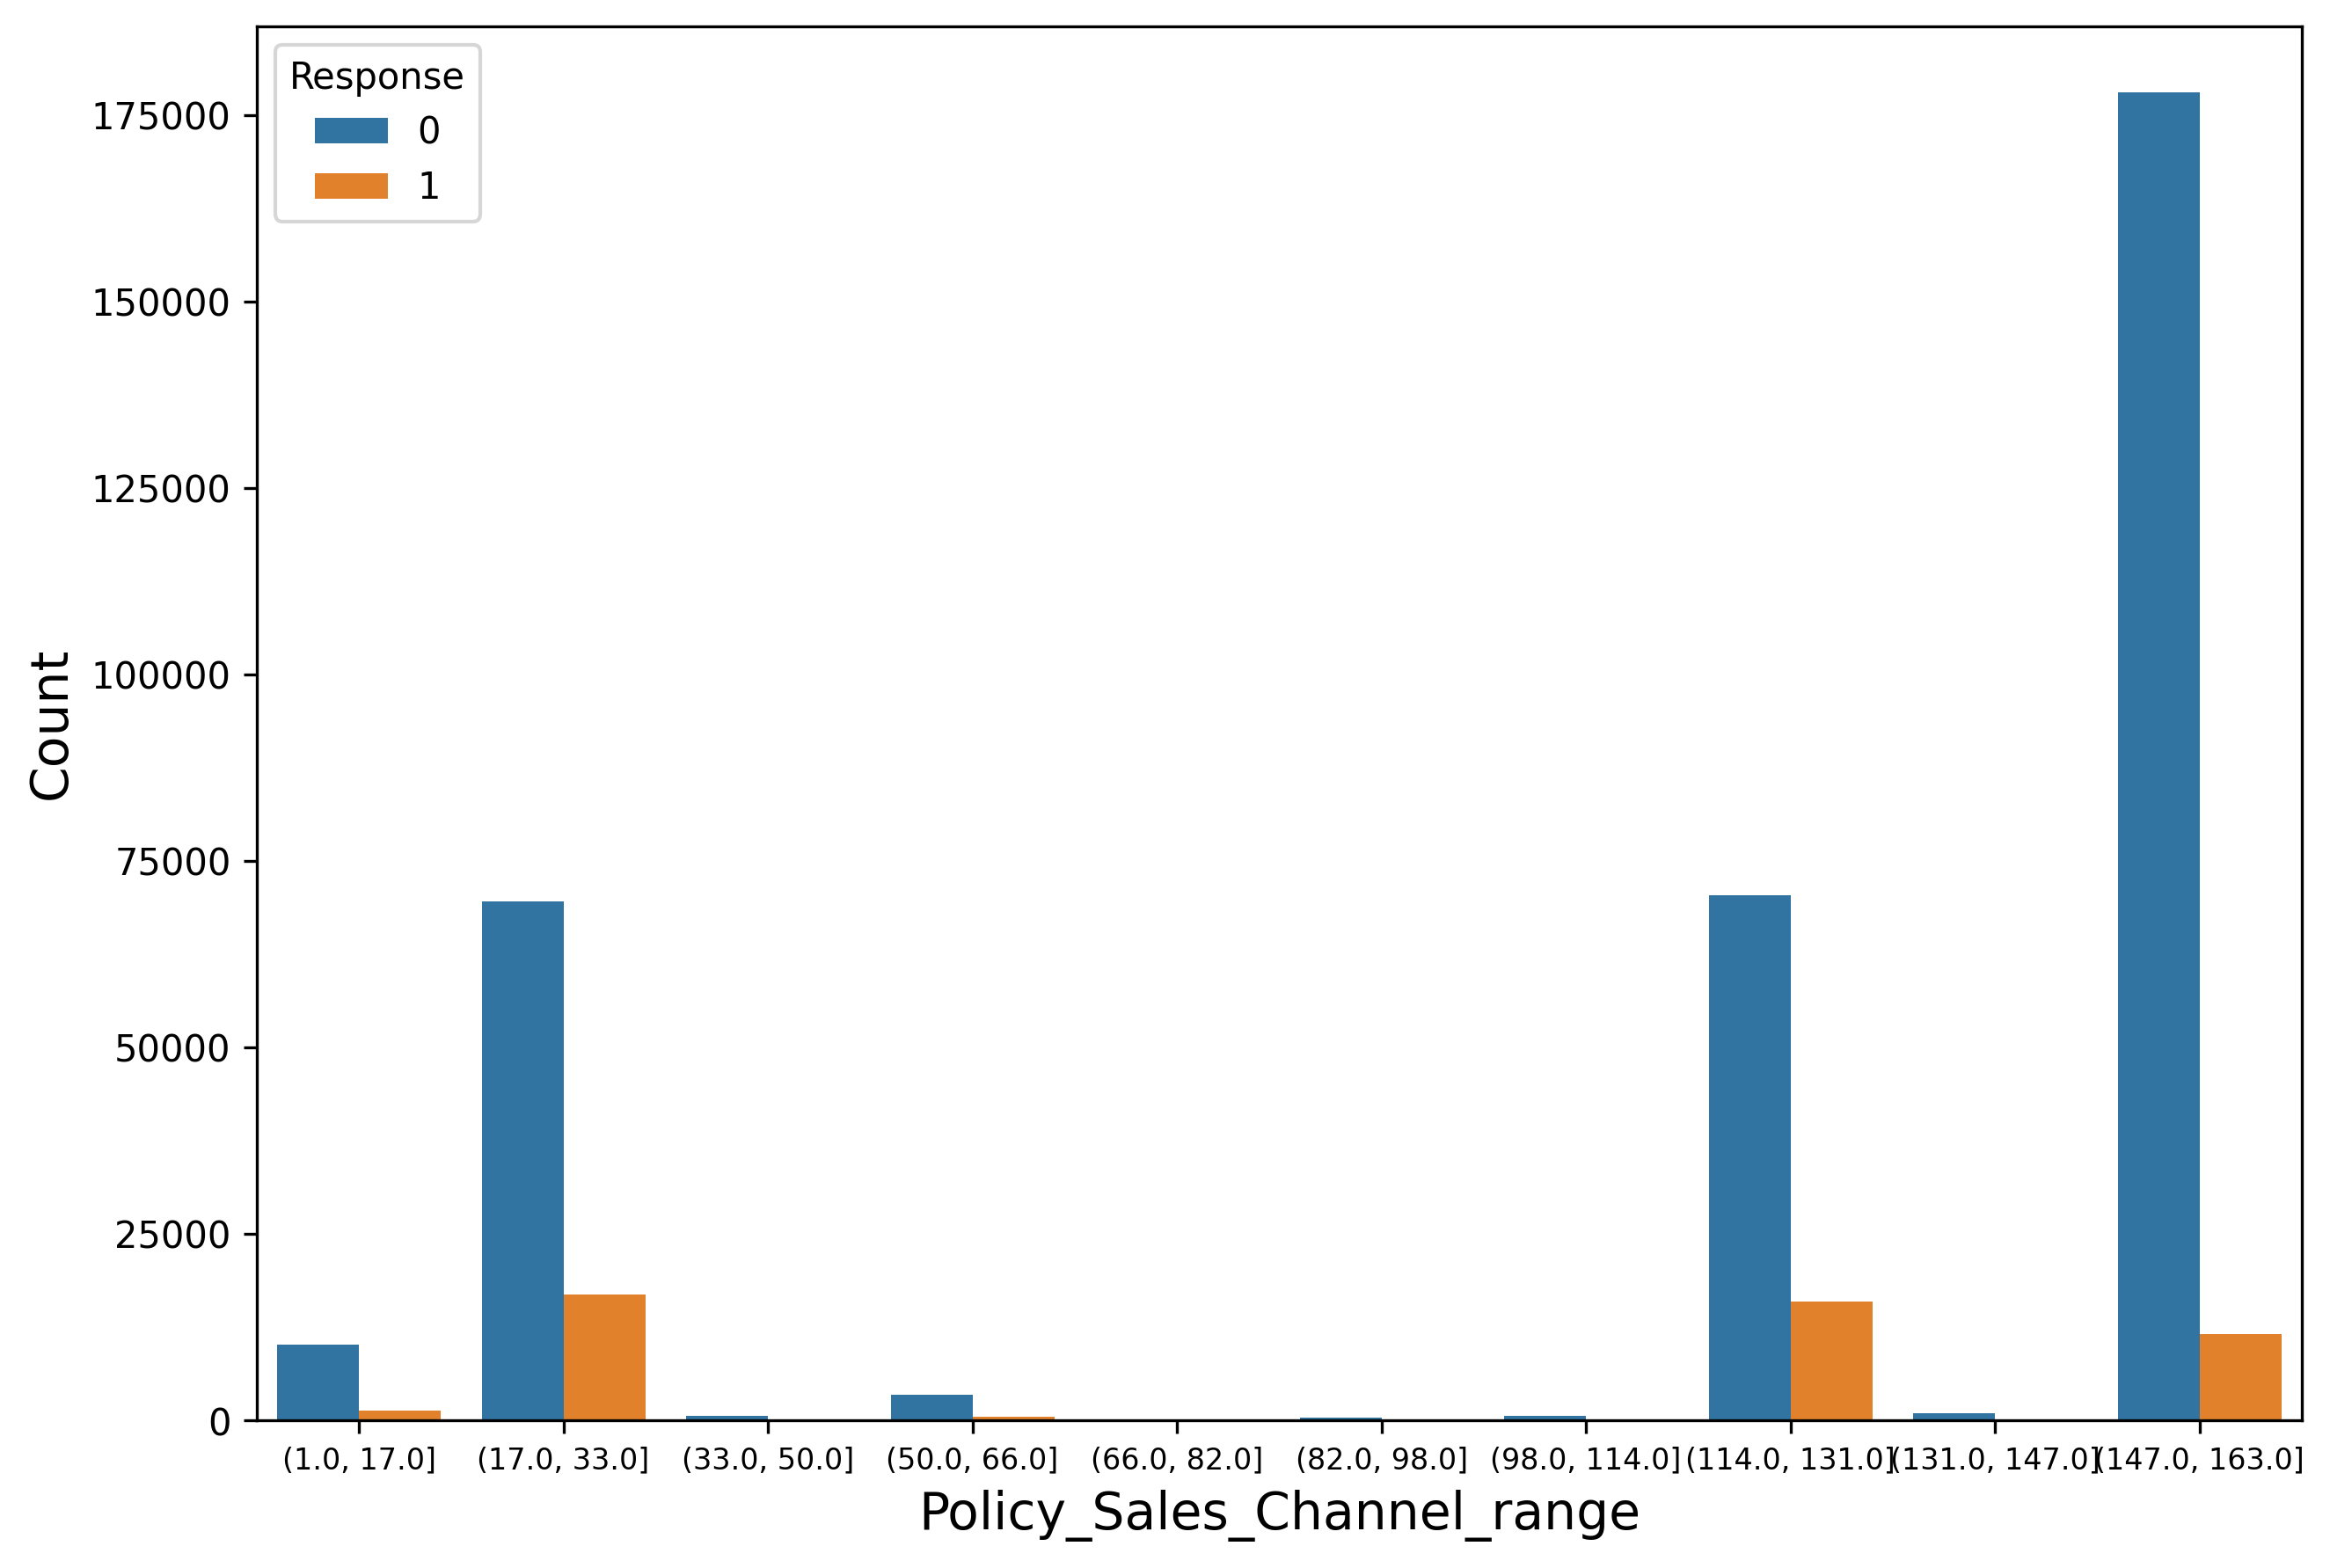

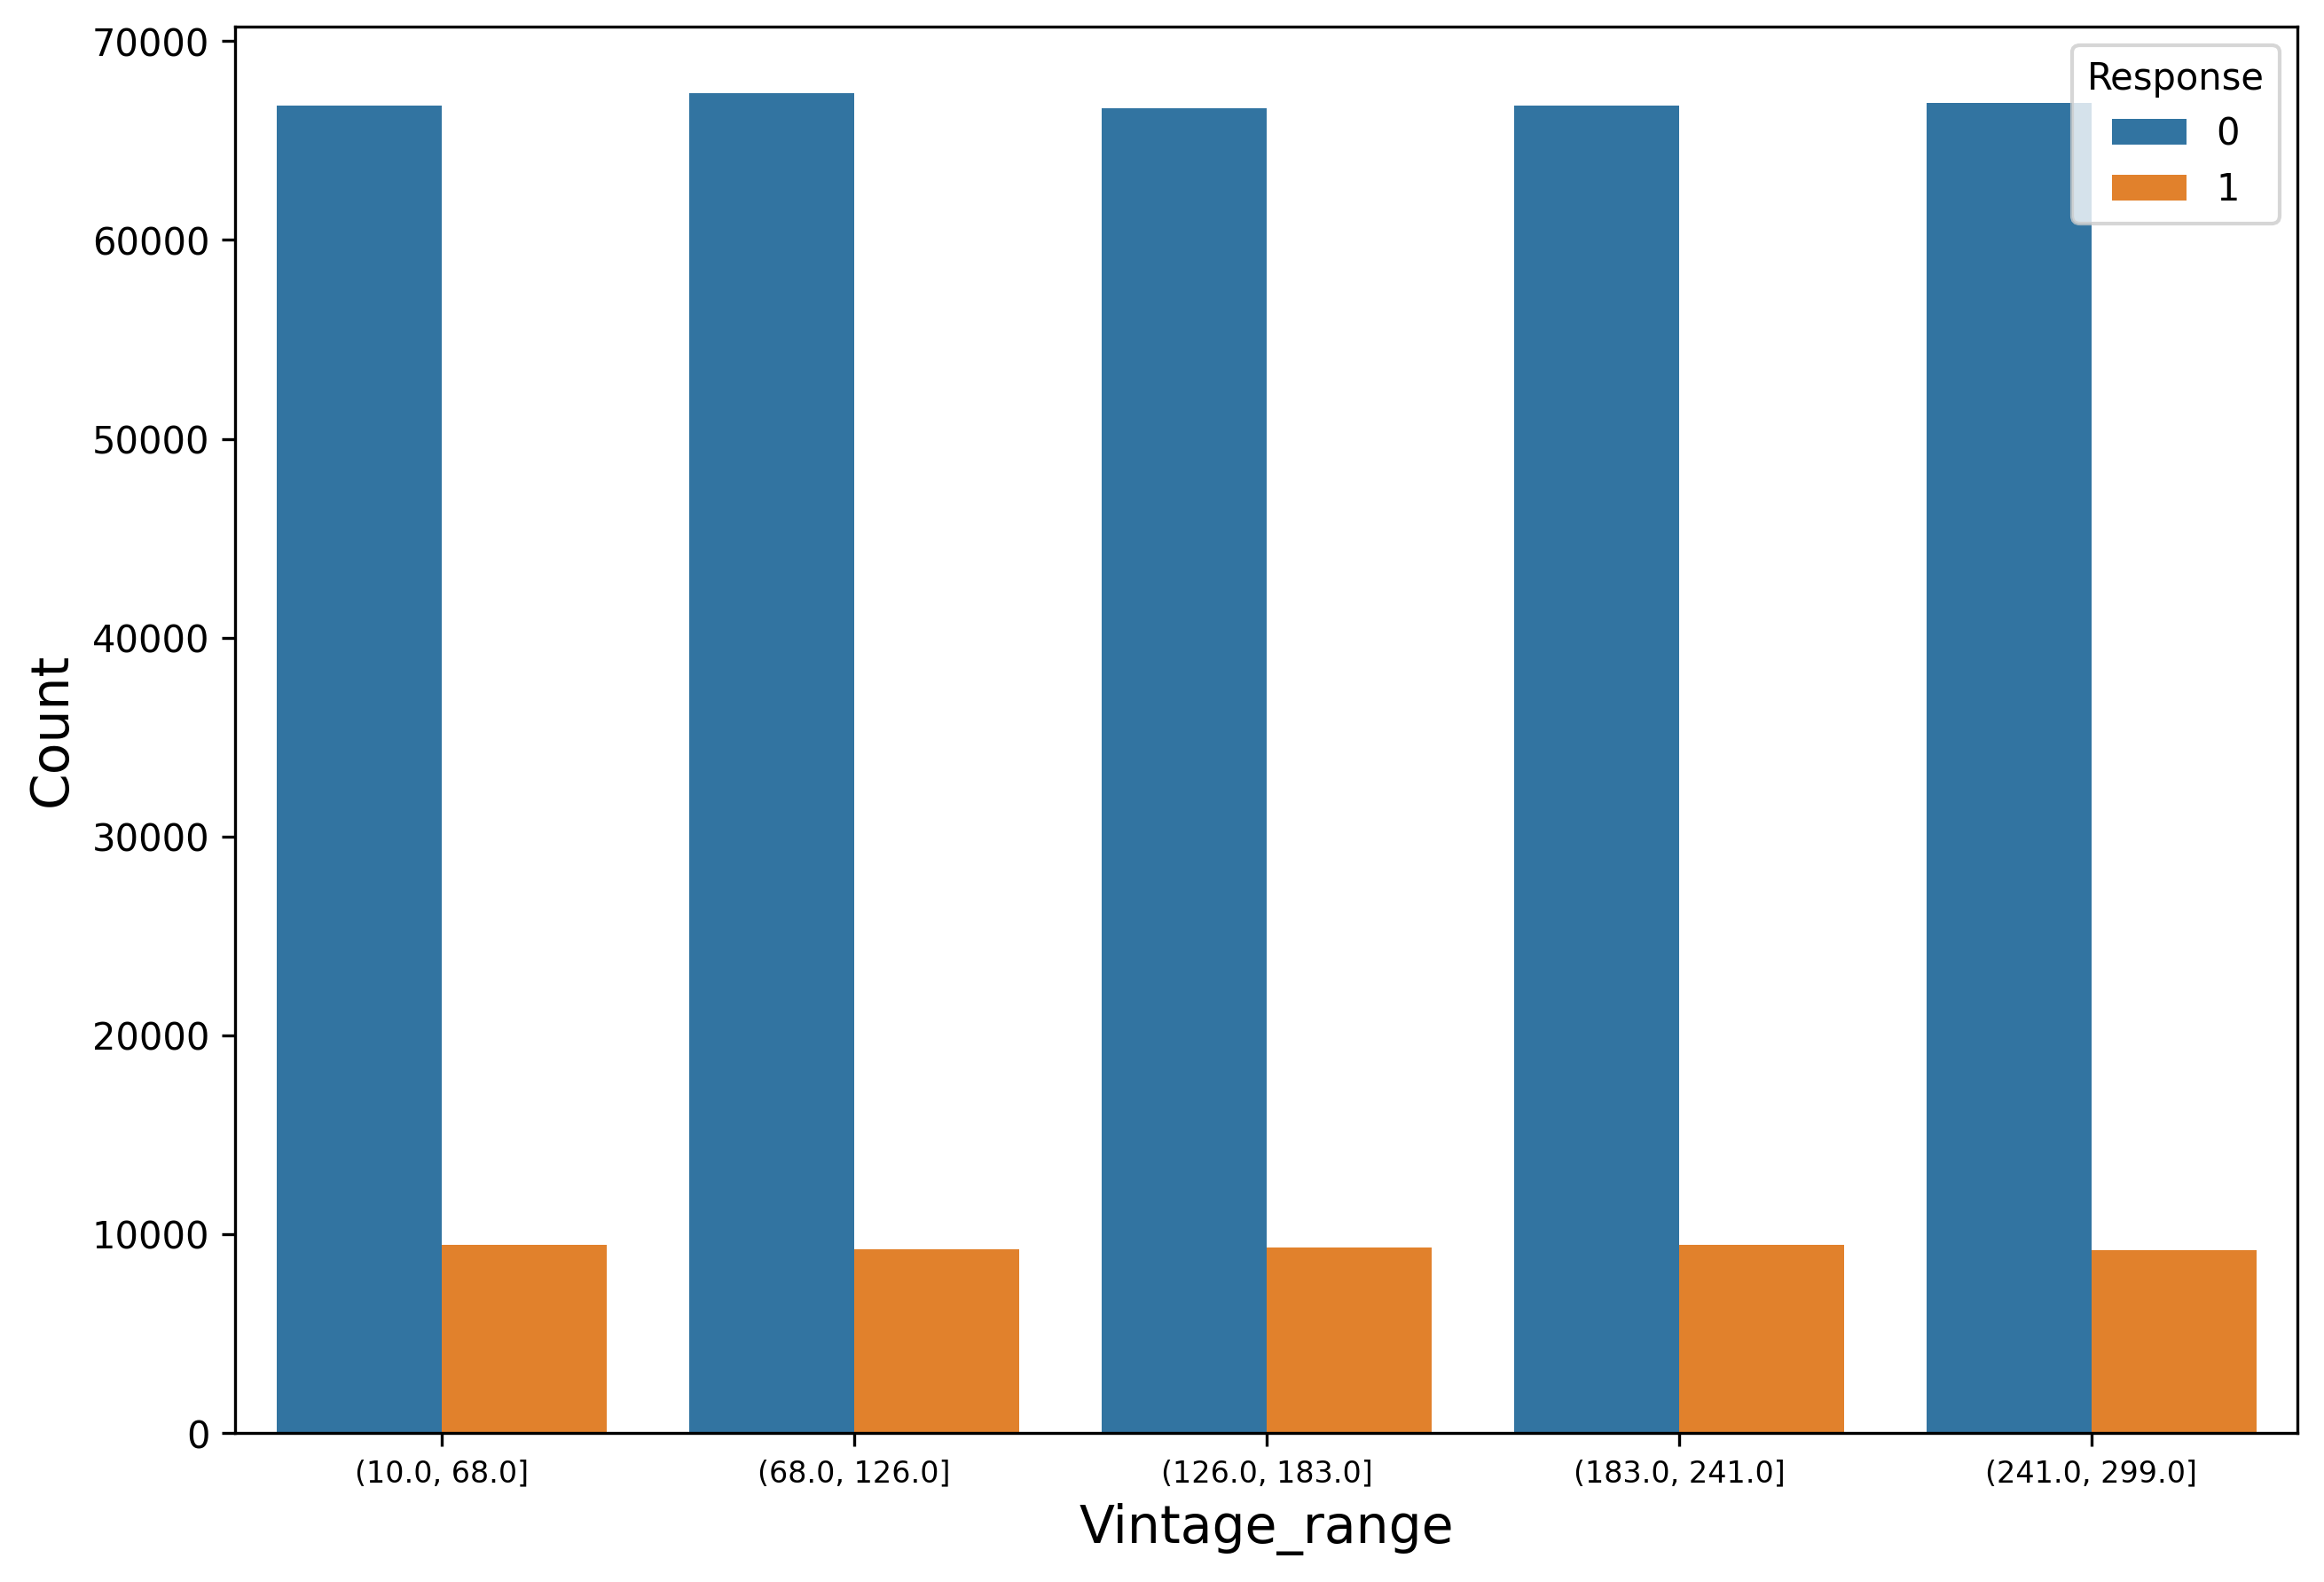

In [12]:
#Age_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Age_range, hue=dataset.Response)
plt.xticks()
plt.xlabel('Age_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Region_Code_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Region_Code_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Region_Code_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Annual_Primium_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Annual_Primium_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Annual_Primium_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Policy_Sales_Channel_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Policy_Sales_Channel_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Policy_Sales_Channel_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Vintage_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Vintage_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Vintage_range',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

# plt.subplot(2,3,6)
# sns.countplot(x=Age_range)
# plt.xticks(fontsize=8)
# plt.xlabel('Age_range',fontsize=14)
# plt.ylabel('Count',fontsize=14)


### -  Age Distribution in the dataset and the Positive  response WRT Age

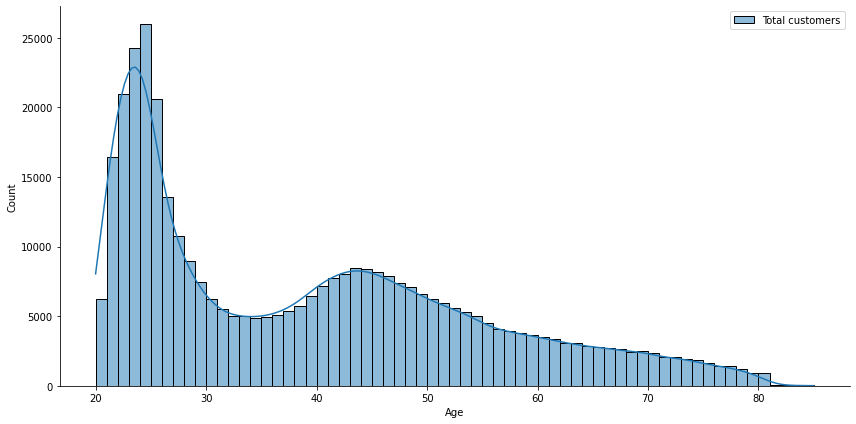

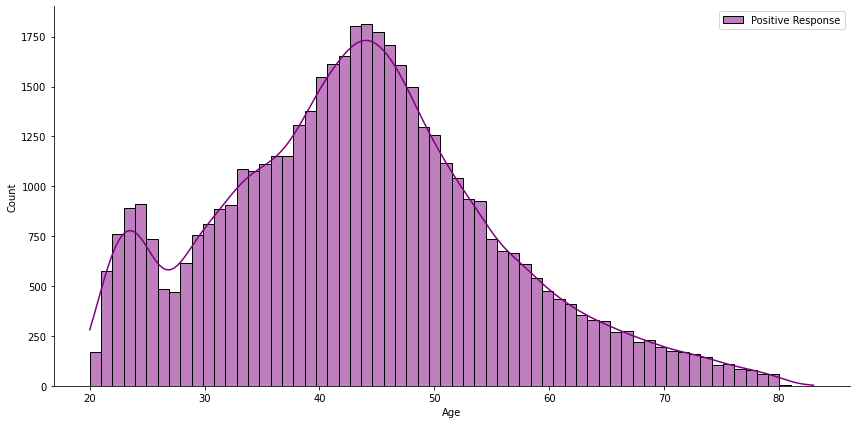

In [13]:
sns.displot(dataset.Age,kde=True, height=6,aspect=2,color=None,label = "Total customers", bins=65)
plt.legend()
sns.displot(dataset.Age.loc[dataset.Response == 1],kde=True,height=6,aspect=2,color='Purple',label = "Positive Response", bins=64)
plt.legend()

**<U>Inference:<U>**

**Age**
   - Majority of the customers are between the age group of 20-30 years.
   - Most of the negative response came from these age group. 
   - In contrast, age groups between 30 - 60 years were more positive towards buying Car Insurance.
   
**Region Code**
  - The region code doesn't seems to influence the response. Larger customer base is observed in the region code between 26 to 31, the majority of the customers are from these regions in both positive and negative response groups.
   
**Annual Premium**
   - The Annual Premium also doesn't seems to influence the response.
   
**Policy Sales Channel**
   - The Policy Sales Channel between 147-163 showed a significant spike in negative response, but overal Policy Sales Channe doesn't influence the response.

**Response by Vintage**
   - The data distribution appeared to be simmilar in both positive and negative response group.

### 2.b - Categorical features

In [14]:
dataset_cat_features

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage']

In [15]:
# getting Dummies for Binary Catagorical features in dataset_mod1:
dataset_mod1=pd.get_dummies(dataset, columns=['Gender','Driving_License','Previously_Insured','Vehicle_Damage'],
                            drop_first=True)

In [16]:
# getting Dummies for non-binary Catagorical features ataset_mod1:
dataset_mod1=pd.get_dummies(dataset_mod1, columns=['Vehicle_Age'])

In [17]:
print('\n columns :',dataset_mod1.columns)

print('\n________________________\n Shape:',dataset_mod1.shape)

dataset_mod1.head()


 columns : Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

________________________
 Shape: (381109, 13)


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,28.0,40454.0,26.0,217,1,1,1,0,1,0,0,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,1,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,1,0,0,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,0,0,1,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,0,0,1,0


In [18]:
dataset_mod1_cat_features = ['Gender_Male',
                             'Driving_License_1',
                             'Previously_Insured_1',
                             'Vehicle_Age_1-2 Year',
                             'Vehicle_Age_< 1 Year',
                             'Vehicle_Age_> 2 Years',
                             'Vehicle_Damage_Yes']

#### Data Counts in Categorical features:

In [19]:
# Data Counts and basic information in Catagorical features
for category in dataset_mod1_cat_features:
    print(dataset_mod1[category].value_counts(), '\n____________________________________\n')


1    206089
0    175020
Name: Gender_Male, dtype: int64 
____________________________________

1    380297
0       812
Name: Driving_License_1, dtype: int64 
____________________________________

0    206481
1    174628
Name: Previously_Insured_1, dtype: int64 
____________________________________

1    200316
0    180793
Name: Vehicle_Age_1-2 Year, dtype: int64 
____________________________________

0    216323
1    164786
Name: Vehicle_Age_< 1 Year, dtype: int64 
____________________________________

0    365102
1     16007
Name: Vehicle_Age_> 2 Years, dtype: int64 
____________________________________

1    192413
0    188696
Name: Vehicle_Damage_Yes, dtype: int64 
____________________________________



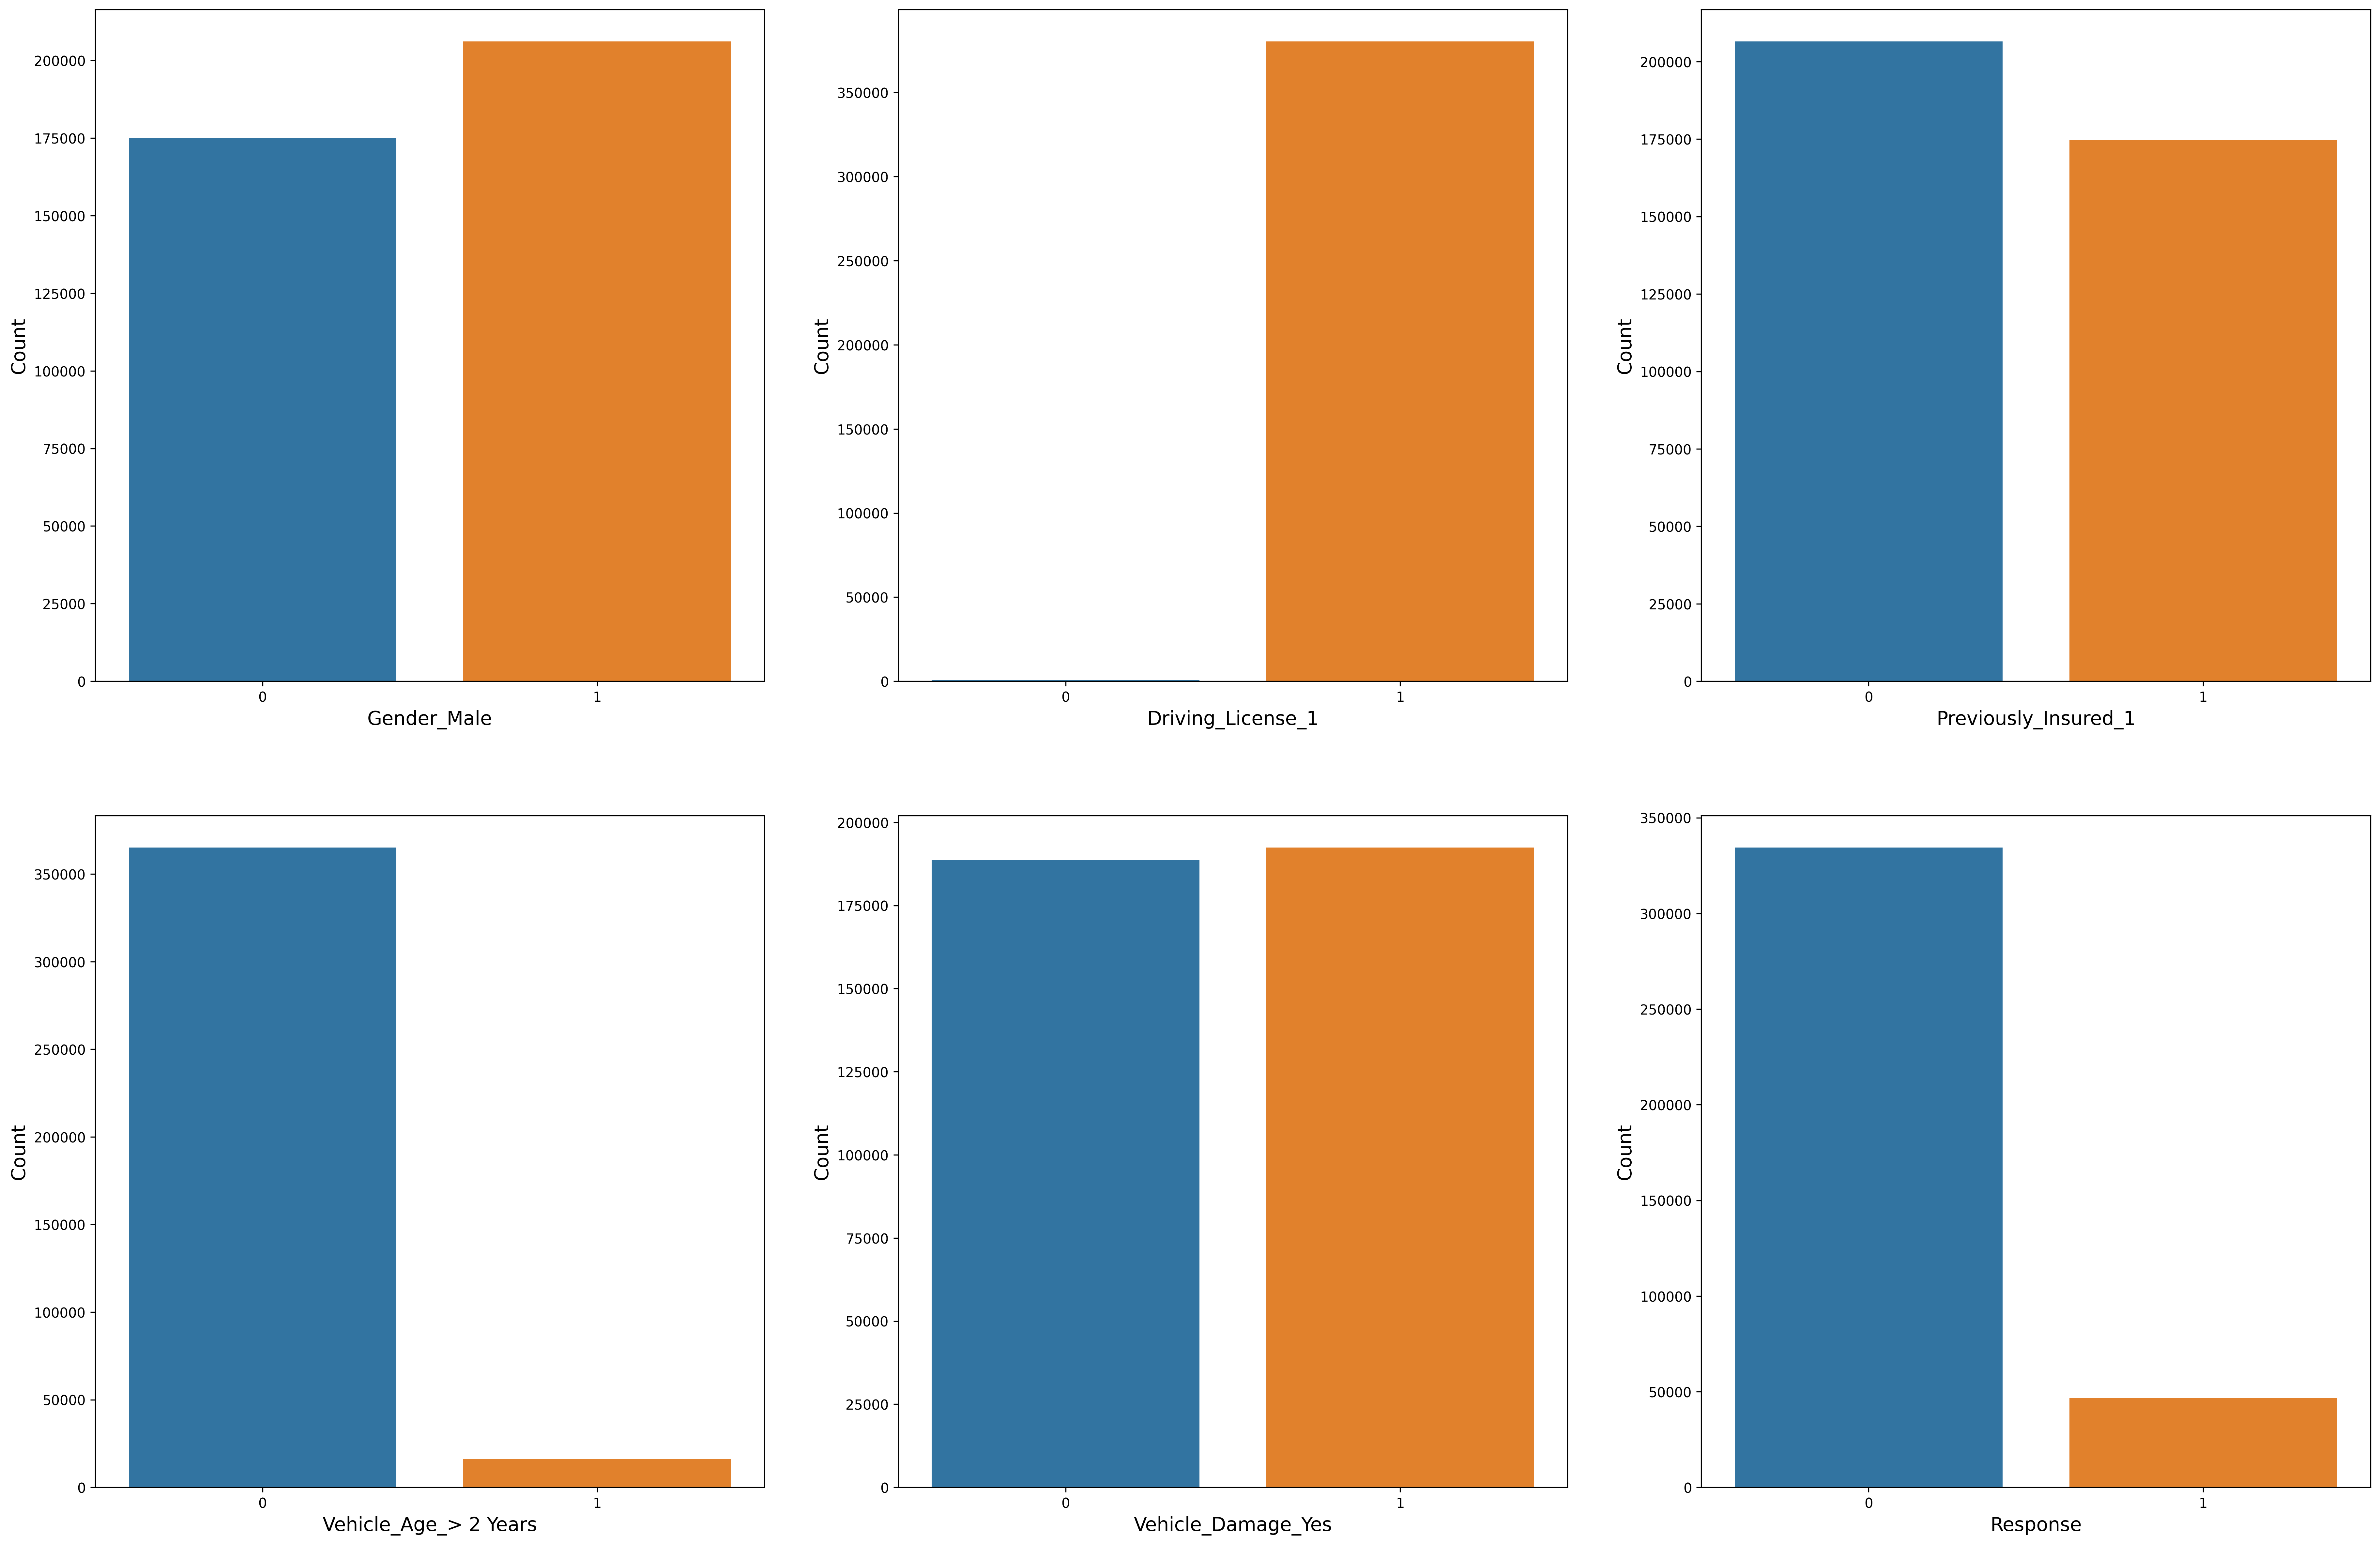

Positive Response - 12.256336113815209%


In [20]:
# ploting counts 

plt.figure(figsize=(30,20),dpi=300)
#Gender
plt.subplot(2,3,1)
sns.countplot(x=dataset_mod1.Gender_Male)
plt.xlabel('Gender_Male',fontsize=14)
plt.ylabel('Count',fontsize=14)


# Driving_License
plt.subplot(2,3,2)
sns.countplot(x=dataset_mod1.Driving_License_1)
plt.xlabel('Driving_License_1',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Previously_Insured
plt.subplot(2,3,3)
sns.countplot(x=dataset_mod1.Previously_Insured_1)
plt.xlabel('Previously_Insured_1',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Vehicle_Age
plt.subplot(2,3,4)
sns.countplot(x=dataset_mod1['Vehicle_Age_> 2 Years'])
plt.xlabel('Vehicle_Age_> 2 Years',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Vehicle_Damage
plt.subplot(2,3,5)
sns.countplot(x=dataset_mod1.Vehicle_Damage_Yes)
plt.xlabel('Vehicle_Damage_Yes',fontsize=14)
plt.ylabel('Count',fontsize=14)

#Response
plt.subplot(2,3,6)
sns.countplot(x=dataset.Response)
plt.xlabel('Response',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

print(f"""Positive Response - {dataset.Response.value_counts()[1]/
(dataset.Response.value_counts()[1] + dataset.Response.value_counts()[0])*100}%""")



**<U>Inference<U>** :
   - The Number of male is slightly higher than the female customer.
   - Majority of them have driving license
   - The Number of previously insured is slightly less compared to number of previously uninsured customers.
   - Majority of the customers have vehicle age less than 2 years.
   - the dataset has slightly more customers with previous vehicle damage experience compared to the customers with no previous experince with vehicle damage.
   - Only 12% out of 381109 customers responded positive to the purchase the additional vehicle insurance offer. this results in a sample size of 46710 positive responses. 

#### Data Distribution in Categirical features 

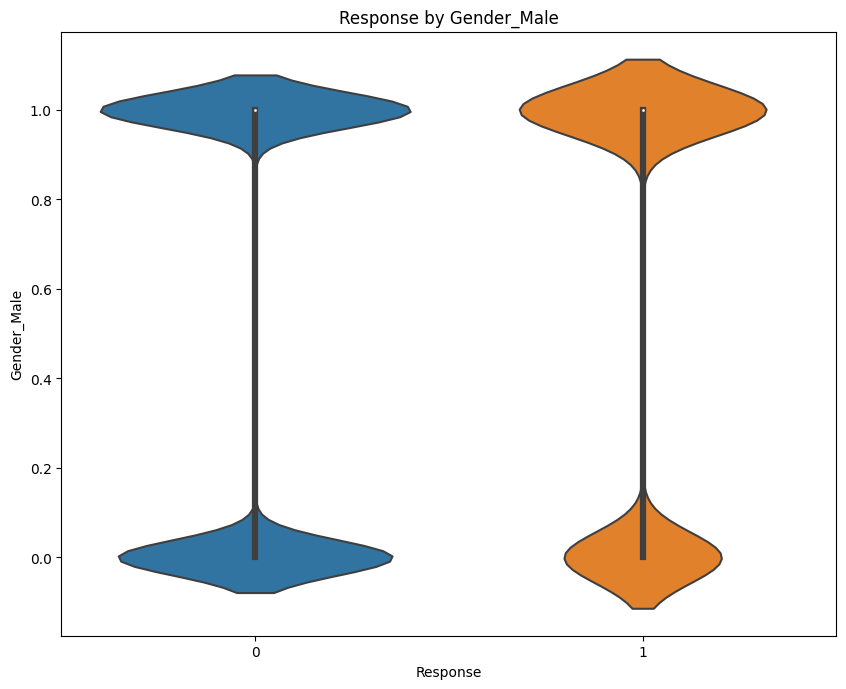

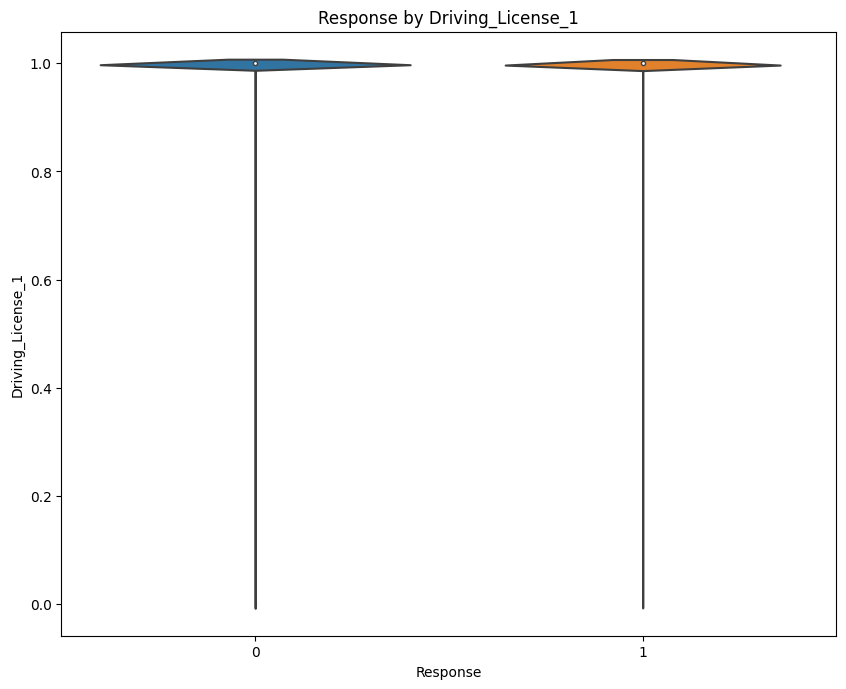

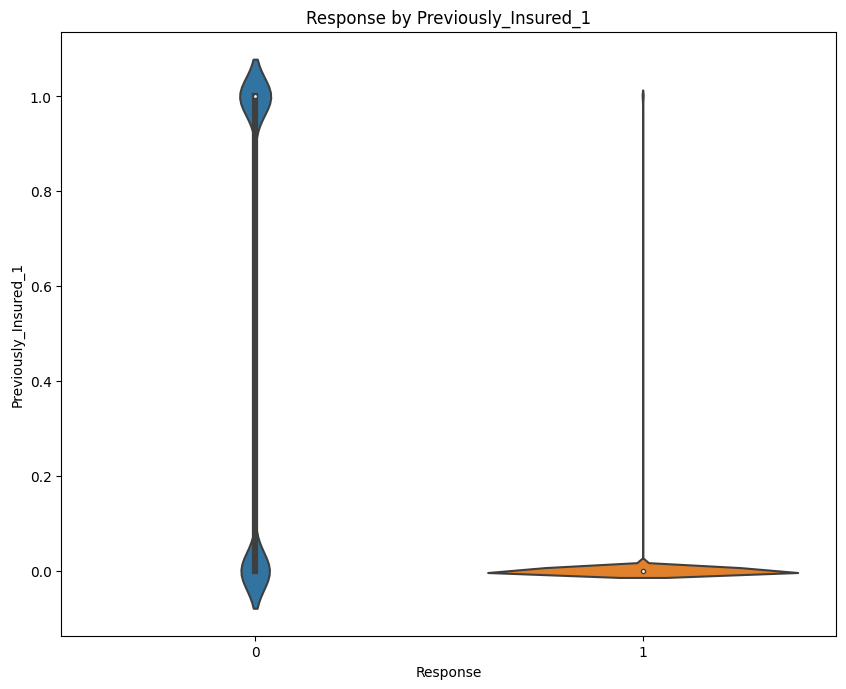

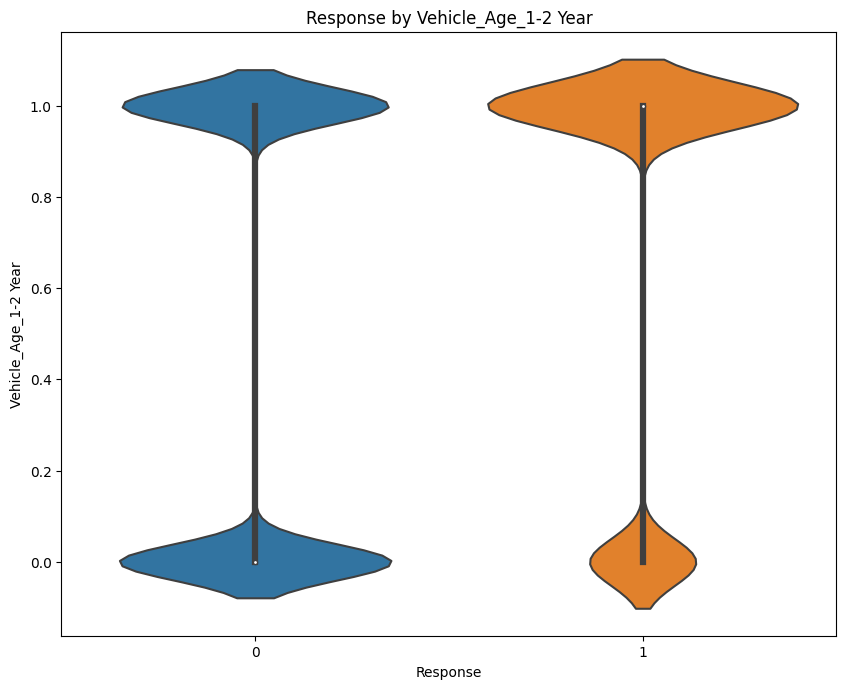

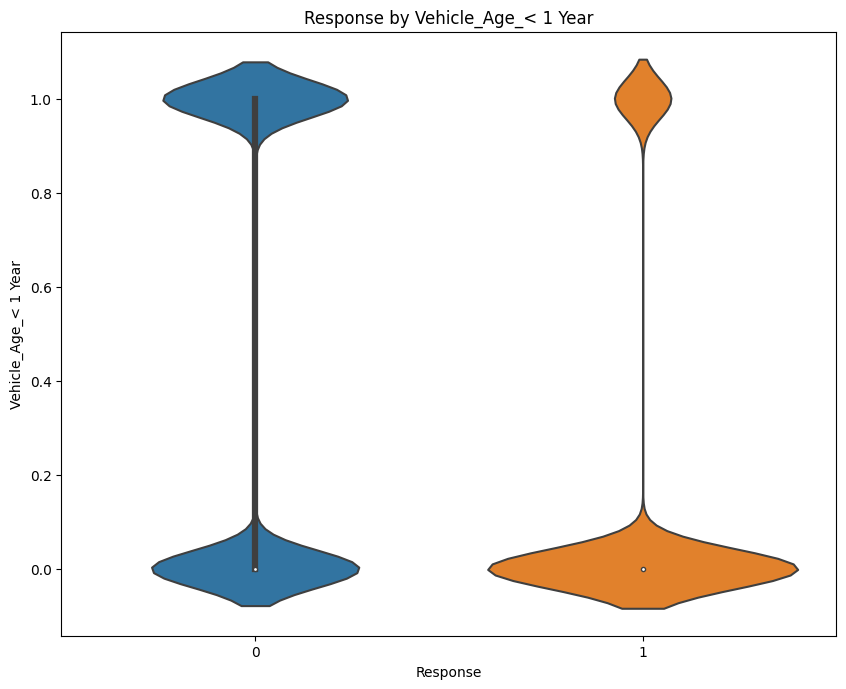

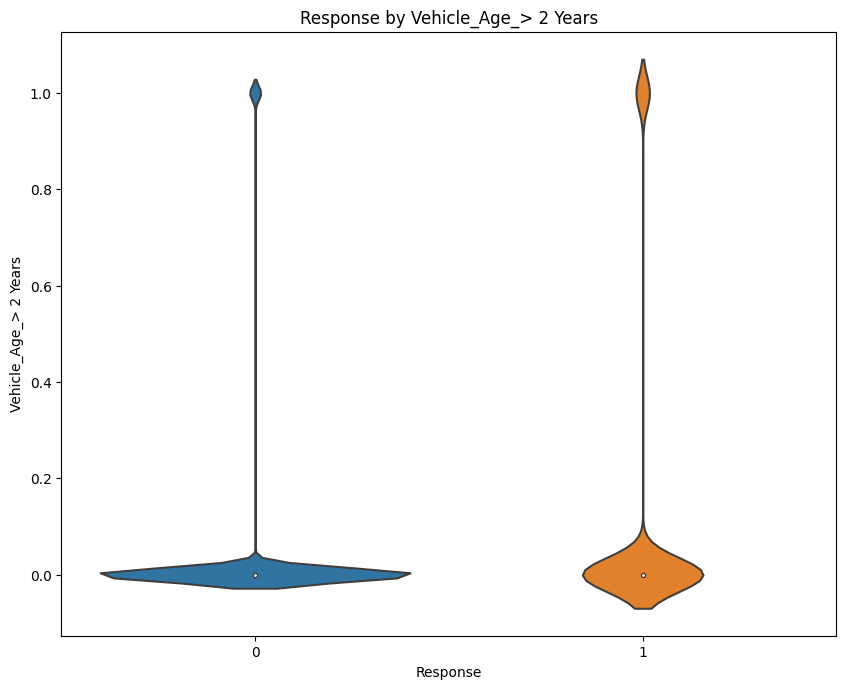

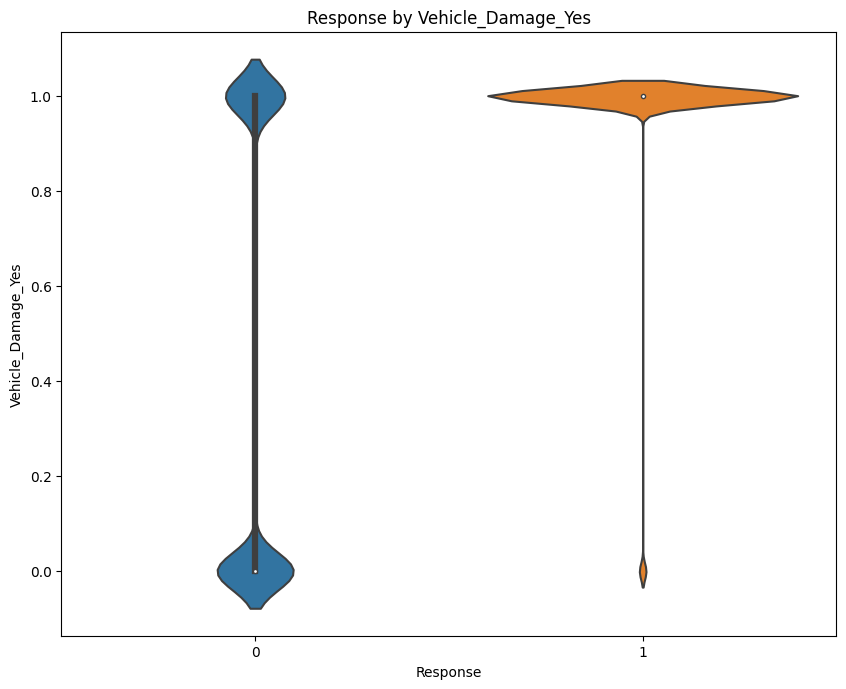

In [21]:
#data distribution of categorical features in both response group
for i in dataset_mod1_cat_features:   
    plt.figure(figsize=(10,8),dpi=100)
    sns.violinplot(x="Response",y=i, data=dataset_mod1)
    plt.title(f"Response by {i}")
    plt.show()


**<U>Inference<U>**:
- Based on the dataset $Gender$, $DrivingLicense$, $RegionCode$ doesn't influence the Response to the vehicle insurence purchasing option.

- A majority of the customer who gave positive response are not $PreviouslyInsured$.

- Customers with newer cars are less willing to buy vehicle insurance

- Customers with no previous experience in Vehicle damage is more reluctent for vehicle insurance.

- Customers from Policy_Sales_Channel arround 25 and 125 showed more positive response. 


#### Correlation between feature

<AxesSubplot:title={'center':'Correlation plot'}>

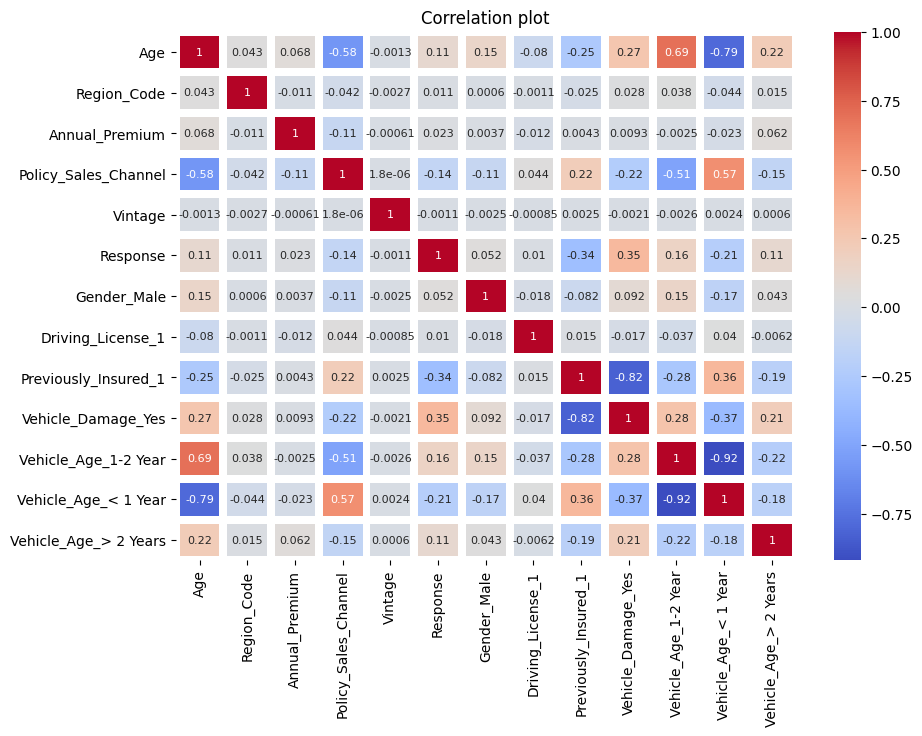

In [22]:
plt.figure(figsize=(10,7),dpi=100)
plt.title("Correlation plot")
sns.heatmap(dataset_mod1.corr(),linewidths=5, annot=True,annot_kws={'size': 8},cmap='coolwarm')

### - Premium Vs Age :

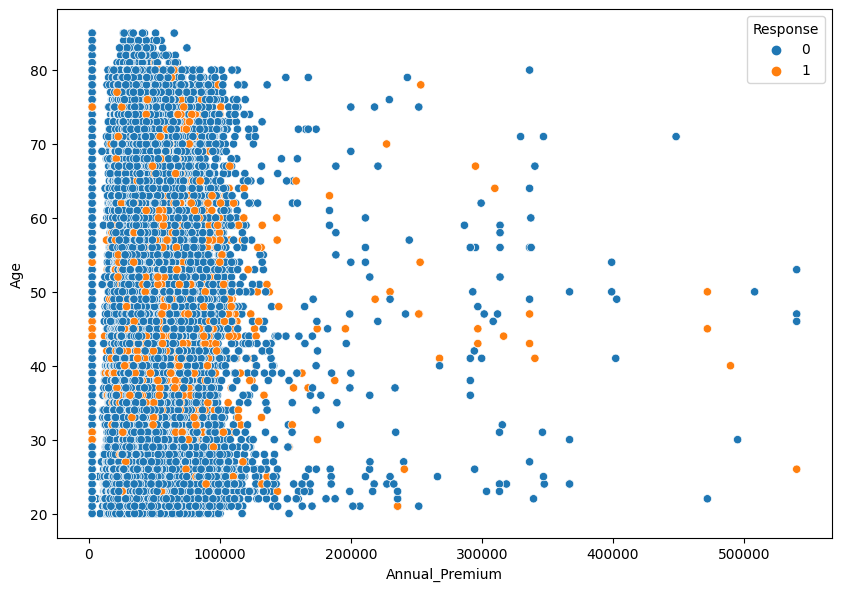

In [23]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Annual_Premium,y=dataset.Age, hue=dataset.Response)
plt.show()

- Most of the customers who responded yes are paying less than 10K as Annual Primium.

### - Premium vs Vintage 

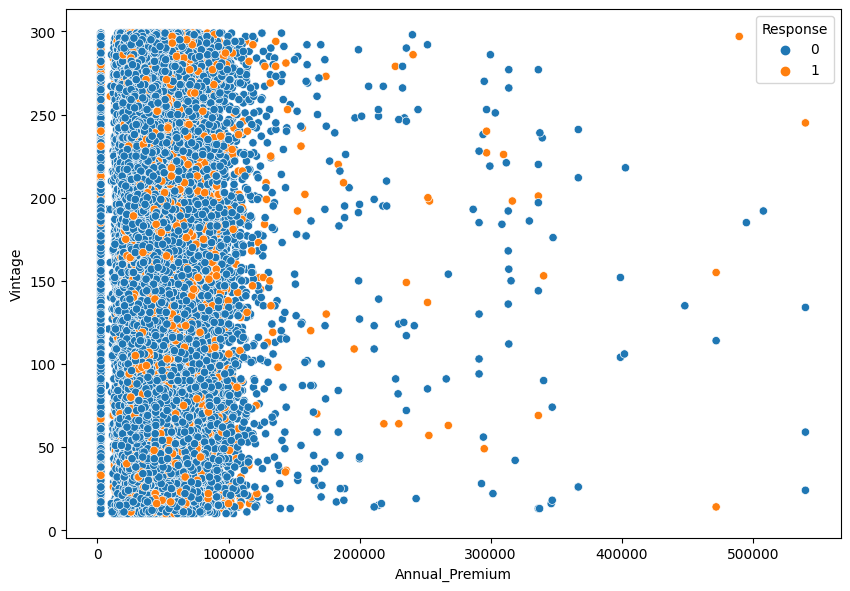

In [24]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Annual_Premium,y=dataset.Vintage, hue=dataset.Response)
plt.show()

- Majority of the customers who responded yes are with company for more than 3 months.

### - Age Vs Vintage 

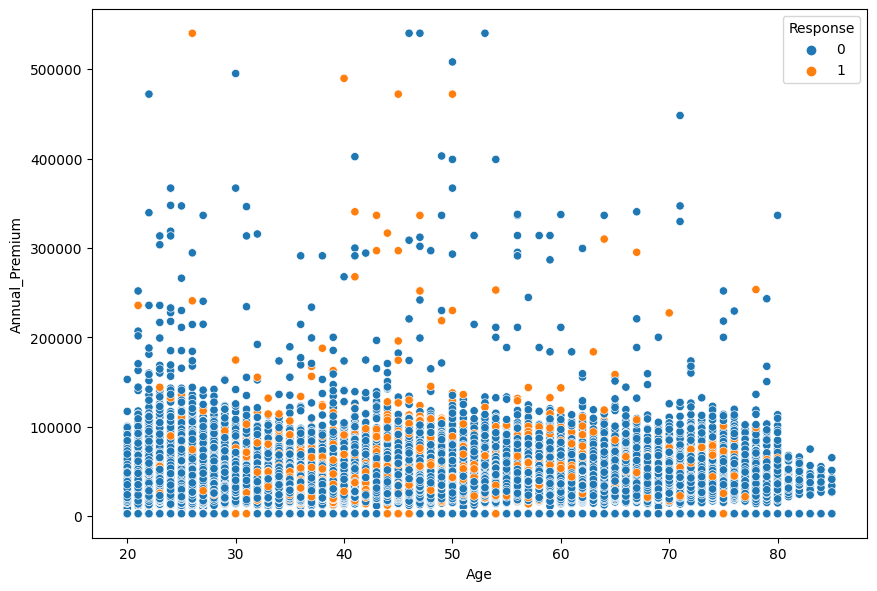

In [25]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Age,y=dataset.Annual_Premium, hue=dataset.Response)
plt.show()

- Most of the customers who responded yes are between 30 to 60 years of age and paying less than 10K as Annual Primium

# Step-3 $$Data-Cleaning-and-Preprocessing$$

In [26]:
# Colums in dataset_mod1
print(dataset_mod1.columns)

Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')


In [27]:
# Arrange columns in dataset_mod1:
dataset_mod1= dataset_mod1[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Response']]

In [28]:
# Renaming columns in dataset_mod1 to prevent future problems with XGBClassifier
dataset_mod1=dataset_mod1.rename(columns={'Vehicle_Age_1-2 Year':'Vehicle_Age_1_to_2 Year','Vehicle_Age_< 1 Year':'Vehicle_Age_lessthan_1_Year',
                             'Vehicle_Age_> 2 Years':'Vehicle_Age_morethan_2 Years'})
dataset_mod1

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Damage_Yes,Vehicle_Age_1_to_2 Year,Vehicle_Age_lessthan_1_Year,Vehicle_Age_morethan_2 Years,Response
0,44,28.0,40454.0,26.0,217,1,1,0,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,1,1,0,0,1,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,0,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,1,1,1,0,0,1,0,0
4,29,41.0,27496.0,152.0,39,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,26.0,30170.0,26.0,88,1,1,1,0,1,0,0,0
381105,30,37.0,40016.0,152.0,131,1,1,1,0,0,1,0,0
381106,21,30.0,35118.0,160.0,161,1,1,1,0,0,1,0,0
381107,68,14.0,44617.0,124.0,74,0,1,0,1,0,0,1,0


In [29]:
print('\n Shape:', dataset_mod1.shape,'\n__________________________\n')
print('Column:',dataset_mod1.columns)


 Shape: (381109, 13) 
__________________________

Column: Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Gender_Male', 'Driving_License_1', 'Previously_Insured_1',
       'Vehicle_Damage_Yes', 'Vehicle_Age_1_to_2 Year',
       'Vehicle_Age_lessthan_1_Year', 'Vehicle_Age_morethan_2 Years',
       'Response'],
      dtype='object')


In [30]:
# Previous Colum names:
print(dataset_mod1_cat_features)

['Gender_Male', 'Driving_License_1', 'Previously_Insured_1', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes']


In [31]:
# modified column names: 
dataset_mod1_cat_features = ['Gender_Male', 'Driving_License_1', 'Previously_Insured_1',
'Vehicle_Damage_Yes', 'Vehicle_Age_1_to_2 Year',
       'Vehicle_Age_lessthan_1_Year', 'Vehicle_Age_morethan_2 Years']
print(dataset_mod1_cat_features)

['Gender_Male', 'Driving_License_1', 'Previously_Insured_1', 'Vehicle_Damage_Yes', 'Vehicle_Age_1_to_2 Year', 'Vehicle_Age_lessthan_1_Year', 'Vehicle_Age_morethan_2 Years']


In [32]:
# Assigned independent and the target features.

X = dataset_mod1.iloc[:, 0:-1]
Y = dataset_mod1.iloc[:, -1]

print(X.shape)
print(Y.shape)

(381109, 12)
(381109,)


In [33]:
print(X)

        Age  Region_Code  Annual_Premium  Policy_Sales_Channel  Vintage  \
0        44         28.0         40454.0                  26.0      217   
1        76          3.0         33536.0                  26.0      183   
2        47         28.0         38294.0                  26.0       27   
3        21         11.0         28619.0                 152.0      203   
4        29         41.0         27496.0                 152.0       39   
...     ...          ...             ...                   ...      ...   
381104   74         26.0         30170.0                  26.0       88   
381105   30         37.0         40016.0                 152.0      131   
381106   21         30.0         35118.0                 160.0      161   
381107   68         14.0         44617.0                 124.0       74   
381108   46         29.0         41777.0                  26.0      237   

        Gender_Male  Driving_License_1  Previously_Insured_1  \
0                 1                

In [51]:
print(Y)

[1 0 1 ... 0 0 0]


### Encoding the dependent/target/response Variable

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(Y)
print(Y)

[1 0 1 ... 0 0 0]


## Splitting the dataset into the Training set and Test/validation set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01, random_state = 0)

In [54]:
print(X_train.shape)
print(X_train)

(377297, 12)
        Age  Region_Code  Annual_Premium  Policy_Sales_Channel  Vintage  \
160238   24         50.0         31265.0                 152.0      185   
183592   43         28.0         48490.0                 139.0      160   
60216    55         28.0         34204.0                 124.0      203   
264772   64          9.0         35348.0                 124.0      252   
151681   44          8.0         32300.0                 124.0       50   
...     ...          ...             ...                   ...      ...   
359783   27         28.0         33223.0                 152.0      220   
358083   53         46.0         40971.0                  26.0      131   
152315   22         45.0         30400.0                 160.0      118   
117952   56         43.0         34849.0                 157.0      229   
305711   23         15.0         30680.0                 152.0       81   

        Gender_Male  Driving_License_1  Previously_Insured_1  \
160238            1   

In [55]:
print(X_test.shape)
print(X_test)

(3812, 12)
        Age  Region_Code  Annual_Premium  Policy_Sales_Channel  Vintage  \
220145   24          8.0         38744.0                 152.0      267   
194704   41         28.0         24929.0                 124.0      156   
203625   72          8.0        113486.0                  26.0       70   
218048   43         47.0          2630.0                 156.0      209   
230458   25         41.0         62383.0                 160.0       20   
...     ...          ...             ...                   ...      ...   
101703   40          4.0         31211.0                 124.0      204   
55621    55         28.0         61974.0                 122.0      244   
118144   65          9.0         20110.0                 124.0      127   
234171   35         11.0          2630.0                 157.0      153   
187892   47         13.0         34383.0                  26.0      120   

        Gender_Male  Driving_License_1  Previously_Insured_1  \
220145            0     

In [56]:
print(Y_train.shape)
print(Y_train)

(377297,)
[0 0 1 ... 0 0 0]


In [57]:
print(Y_test.shape)
print(Y_test)

(3812,)
[0 0 0 ... 0 1 0]


## Feature Scaling

In [58]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [59]:
# print(X_train.shape)
# print(X_train)

In [60]:
# print(X_test.shape)
# print(X_test)

# Step-4 $$Data-Modelling-and-Evaluation$$

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

## 4.2 -  XGBoost

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier

In [63]:
XGB_classifier = XGBClassifier()

## 4.2.b - XGBClassifier (RandomizedSearch)

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# A parameter grid for XGBClassifier
XGB_parameters = {'eta':[0.01,0.02,0.03,0.04,0.05],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_depth': [3, 5, 7, 9],
          'min_child_weight': [1, 5, 10],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0]
         }

In [66]:
XGB_classifier_random = RandomizedSearchCV(estimator = XGB_classifier, param_distributions = XGB_parameters, n_iter = 10, 
                               cv = 10, verbose= 1, random_state= 42, n_jobs = -1)

In [67]:
XGB_classifier_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.6min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

### Predicting the Test/Validation set results¶¶

In [68]:
Y_pred = XGB_classifier_random.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


### Classification Report

In [69]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3351
           1       0.67      0.00      0.01       461

    accuracy                           0.88      3812
   macro avg       0.77      0.50      0.47      3812
weighted avg       0.85      0.88      0.82      3812



### Confusion Matrix

[[3350    1]
 [ 459    2]]
Accuracy Score :0.8793284365162645


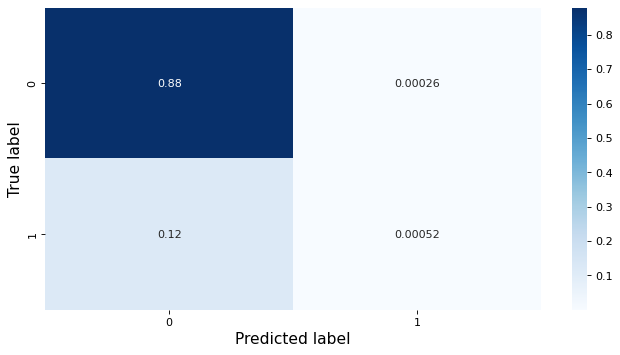

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Ploting AUC/ROC  

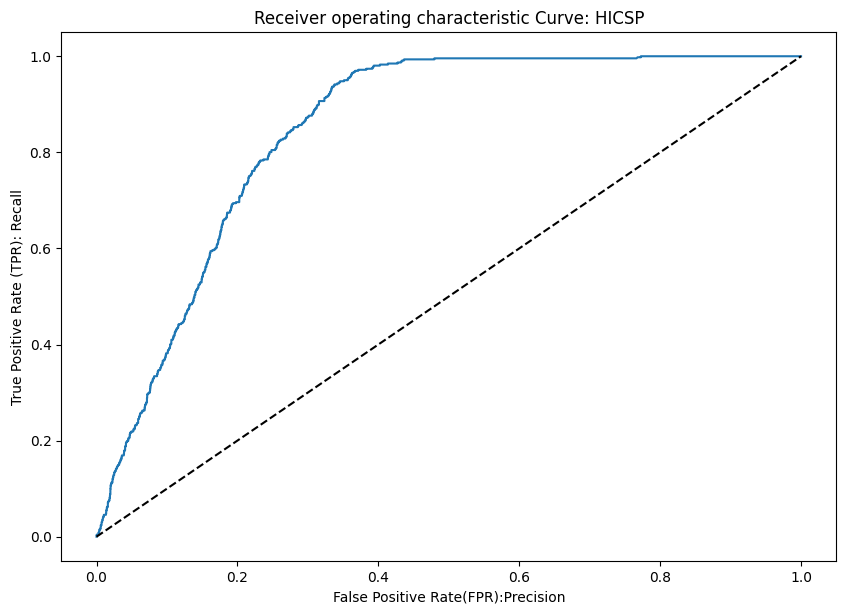

Area under curve (AUC):  0.8470978003134364


In [71]:
Y_pred_proba = XGB_classifier_random.predict_proba(X_test)
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### Model Save and Load

In [65]:
# import pickle

# ## Save
# filename = 'HICSP_XGB_random.sav'
# pickle.dump(XGB_classifier_random, open(filename, 'wb'))

# ## Load
# HICSP_xgb_random_load = pickle.load(open(filename, 'rb'))